In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import os
import wrangle
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

#imports for regression modeling

from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting our models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#feature selection
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


In [2]:
white = pd.read_csv('white_wine.csv')
white_wines = 'White Wine'
white['Wine_Color'] = white_wines
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  Wine_Color            4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [3]:
red = pd.read_csv('red_wine.csv')
red_wines = 'Red Wine'
red['Wine_Color'] = red_wines
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Wine_Color            1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [4]:
frames = [white, red]

In [5]:
wines = pd.concat(frames)
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine_Color            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [6]:
wines = wines.rename(columns=({'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}))
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White Wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White Wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White Wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine


In [7]:
wines.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
794,10.1,0.270,0.54,2.30,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,6,Red Wine
831,5.9,0.610,0.08,2.10,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,Red Wine
4029,6.1,0.280,0.30,7.75,0.031,33.0,139.0,0.99296,3.22,0.46,11.0,6,White Wine
1491,5.6,0.540,0.04,1.70,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5,Red Wine
176,7.2,0.320,0.47,5.10,0.044,19.0,65.0,0.99100,3.03,0.41,12.6,4,White Wine
2744,6.7,0.270,0.33,3.60,0.034,9.0,45.0,0.99144,3.08,0.40,10.5,6,White Wine
1432,5.9,0.440,0.00,1.60,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,6,Red Wine
3958,5.6,0.185,0.19,7.10,0.048,36.0,110.0,0.99438,3.26,0.41,9.5,6,White Wine
2387,6.9,0.300,0.30,1.30,0.053,24.0,186.0,0.99361,3.29,0.54,9.9,4,White Wine
1587,6.4,0.250,0.74,7.80,0.045,52.0,209.0,0.99560,3.21,0.42,9.2,6,White Wine


In [8]:
wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


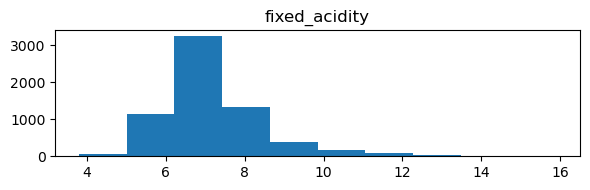

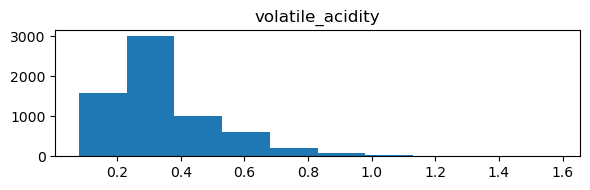

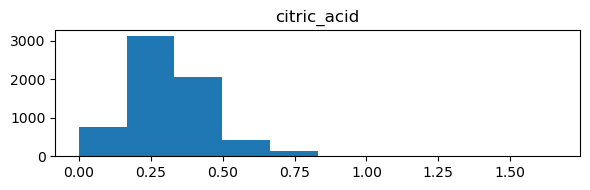

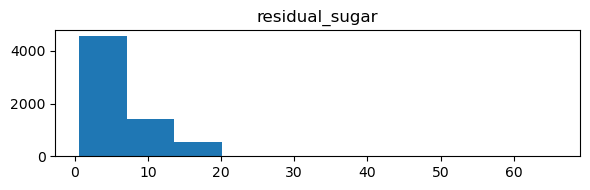

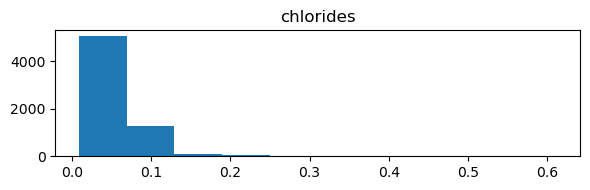

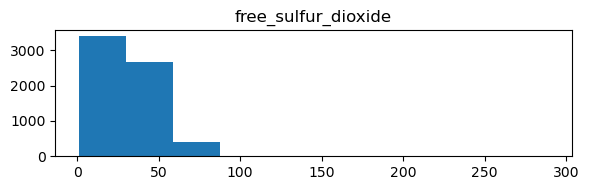

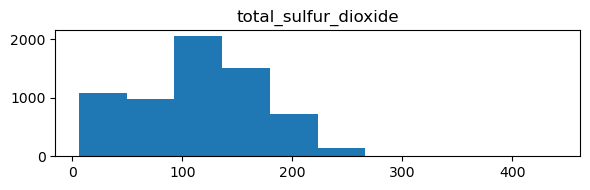

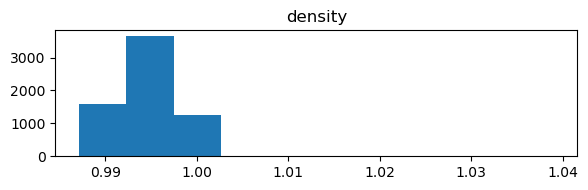

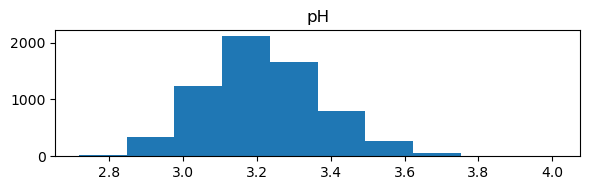

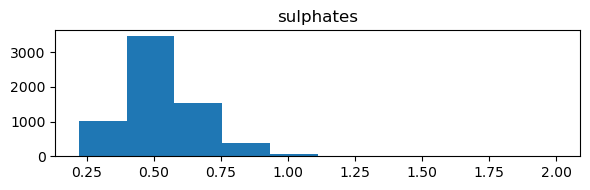

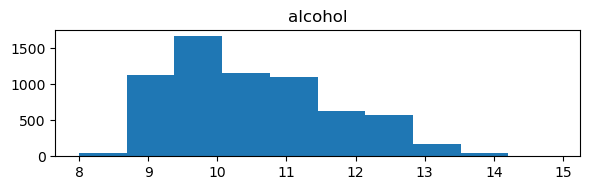

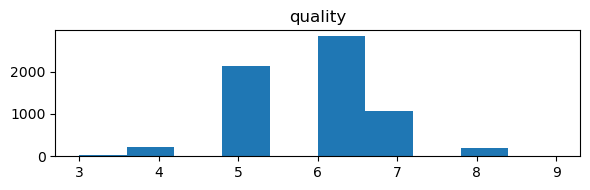

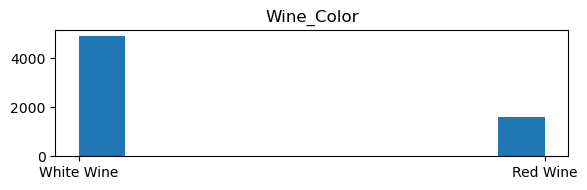

In [9]:
for col in wines:
    plt.figure(figsize = (6,2))
    plt.hist(wines[col])
    plt.title(f'{col}')
    plt.tight_layout();

FIXED_ACIDITY
count of unique: 106


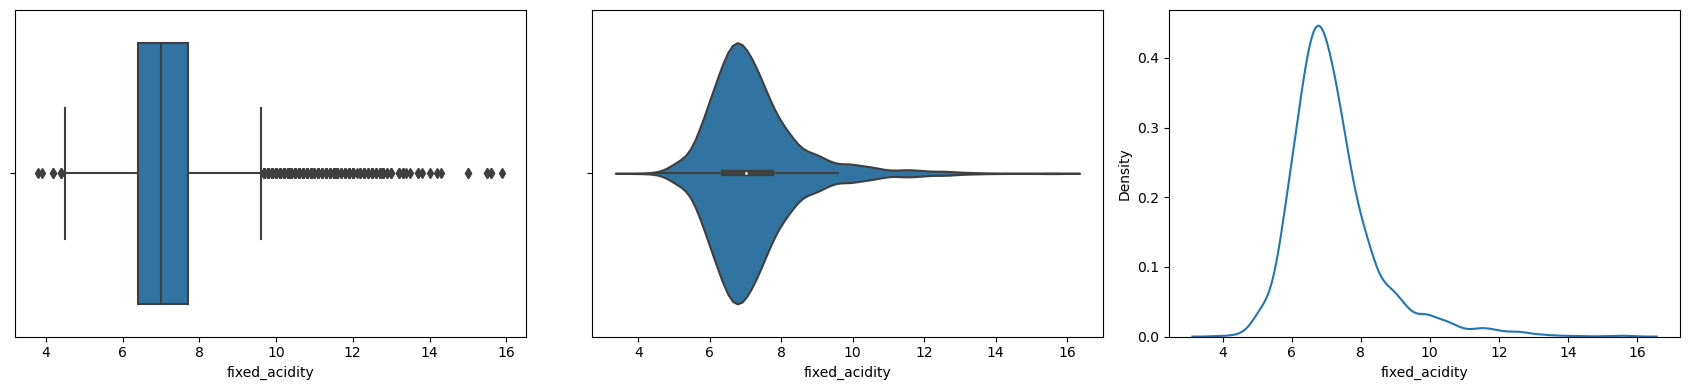

VOLATILE_ACIDITY
count of unique: 187


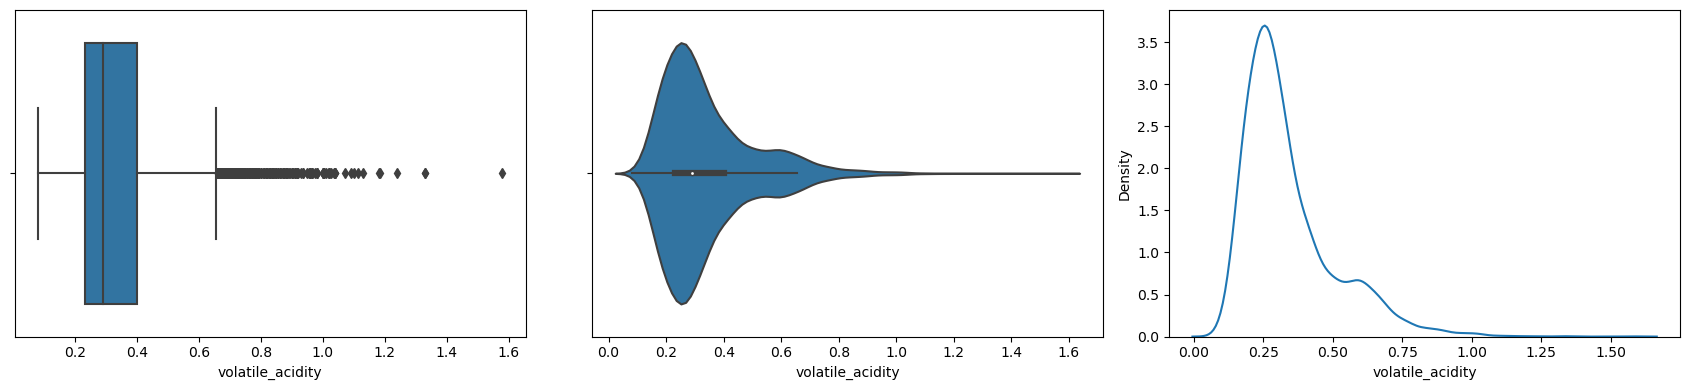

CITRIC_ACID
count of unique: 89


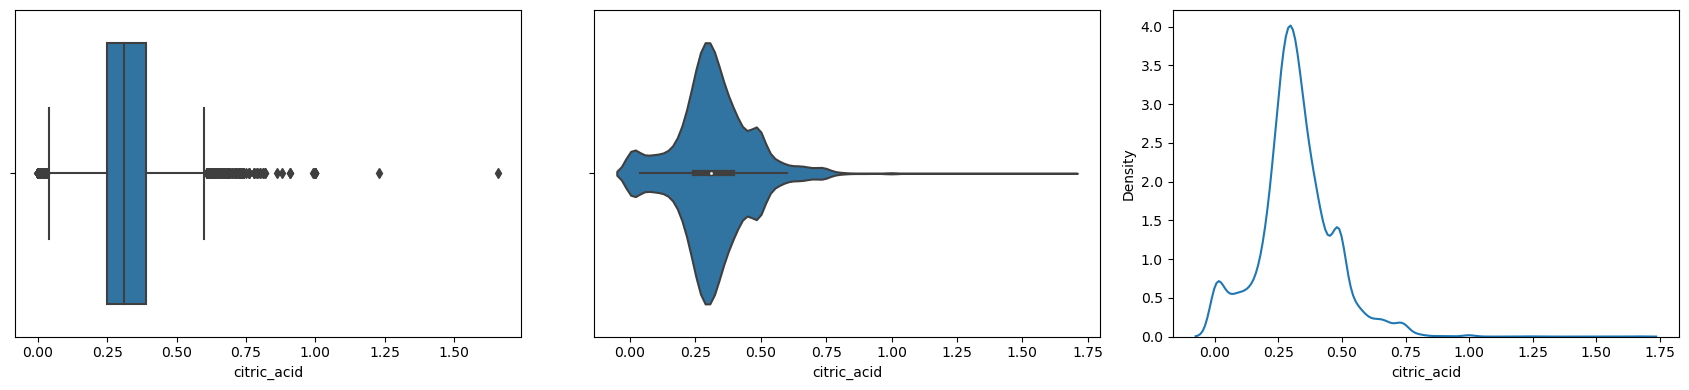

RESIDUAL_SUGAR
count of unique: 316


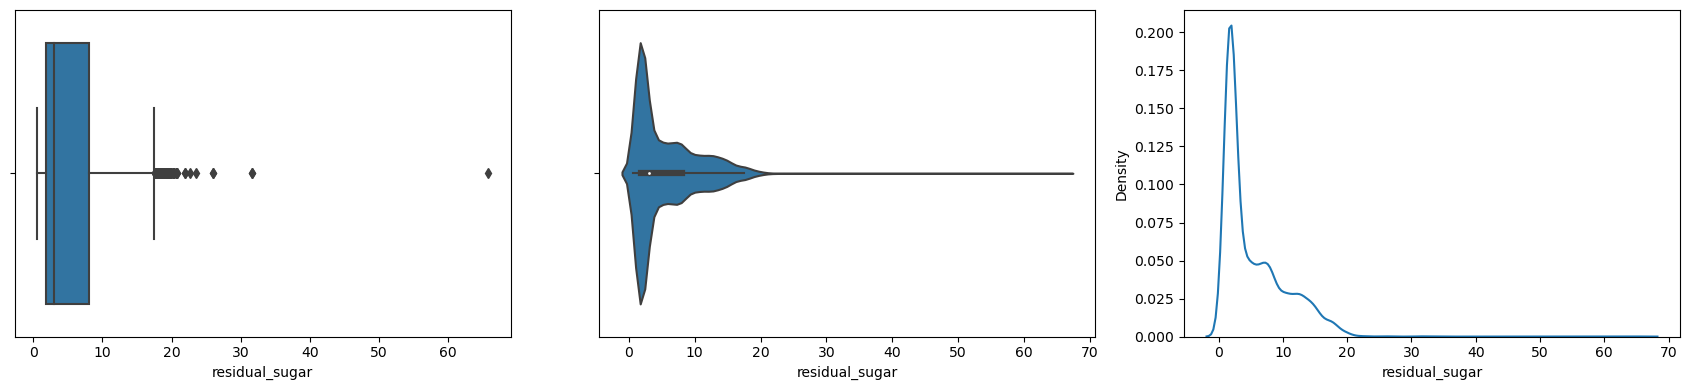

CHLORIDES
count of unique: 214


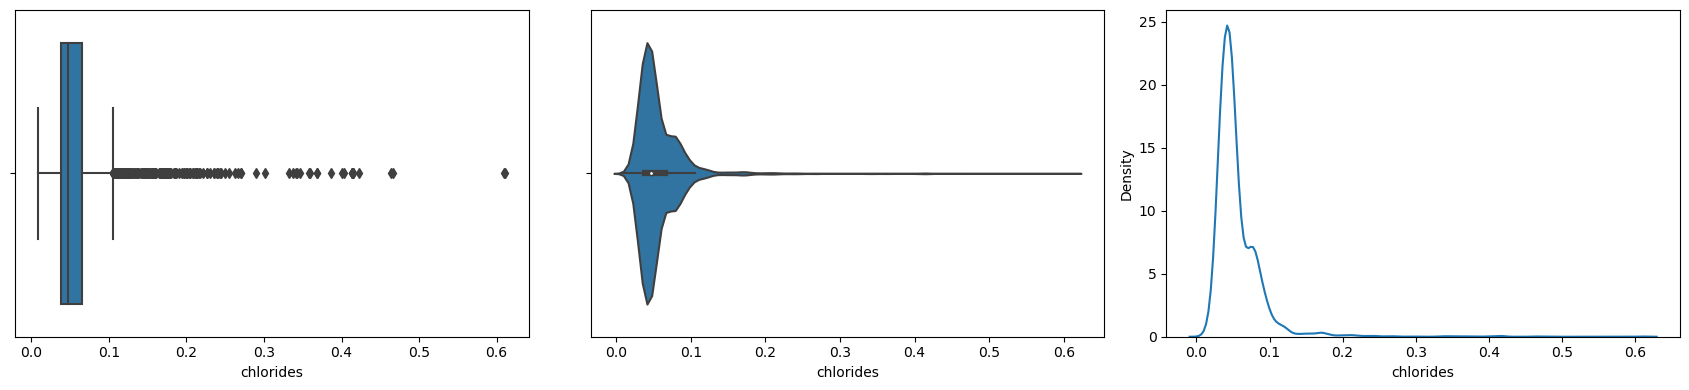

FREE_SULFUR_DIOXIDE
count of unique: 135


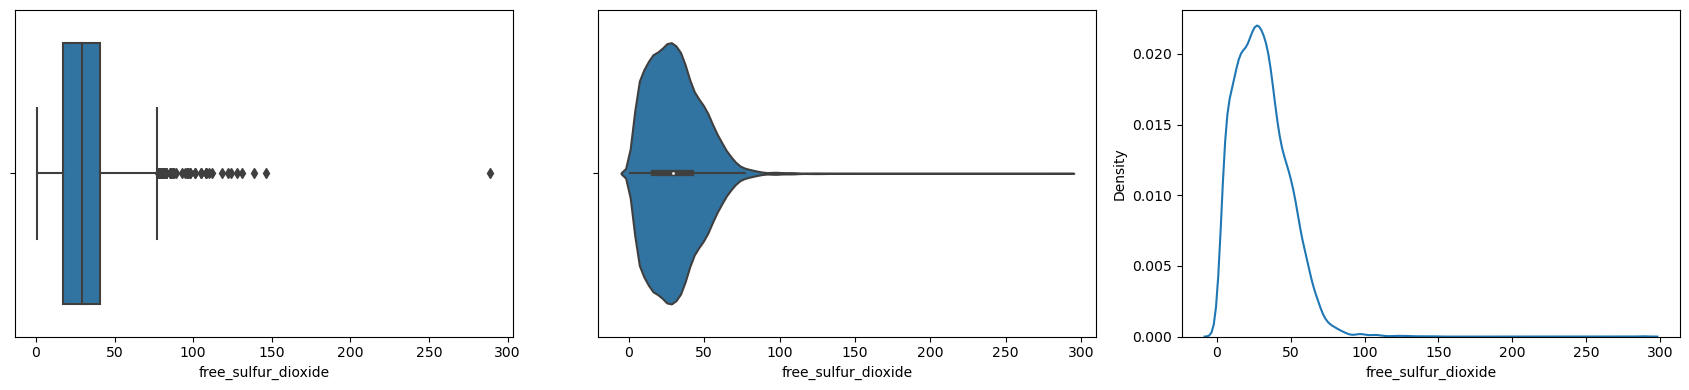

TOTAL_SULFUR_DIOXIDE
count of unique: 276


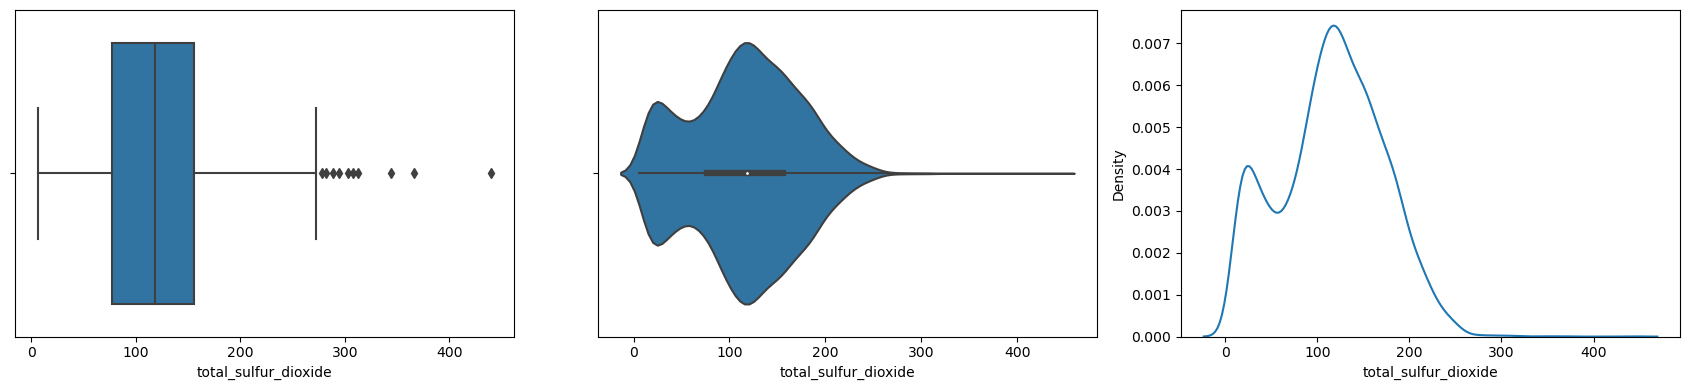

DENSITY
count of unique: 998


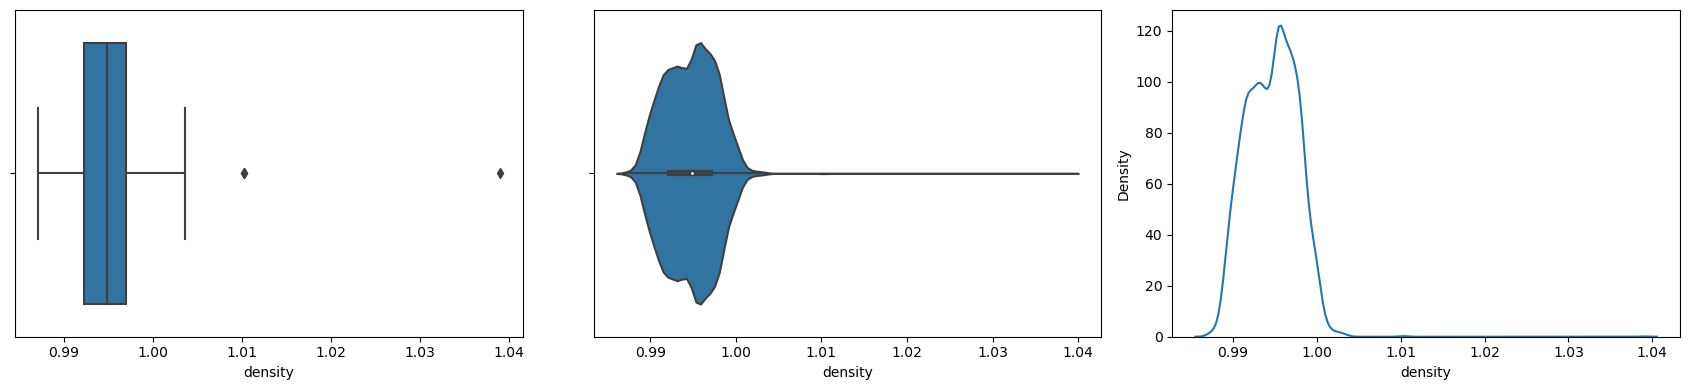

PH
count of unique: 108


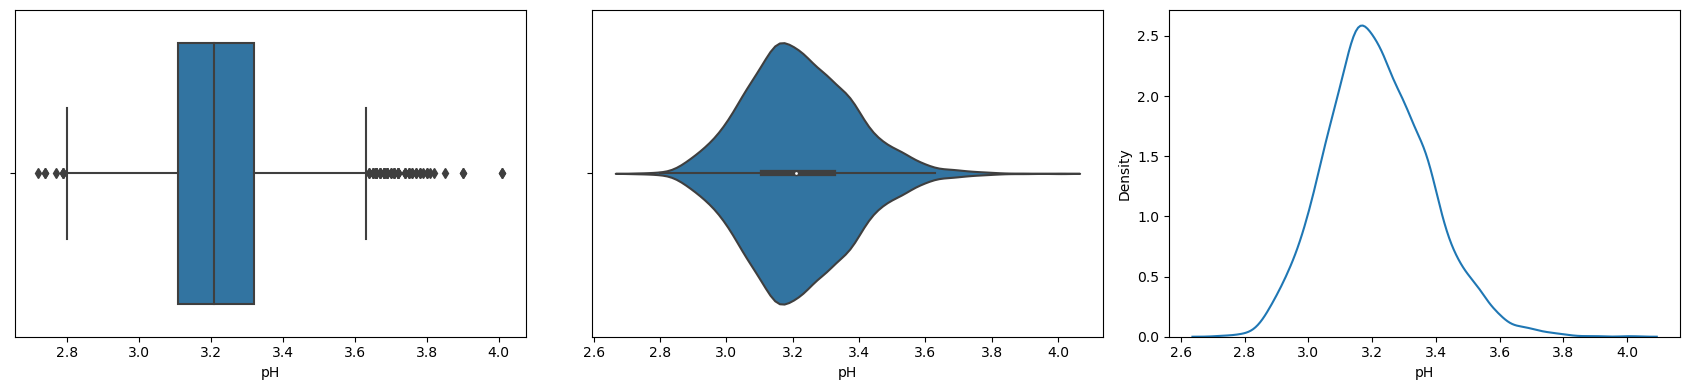

SULPHATES
count of unique: 111


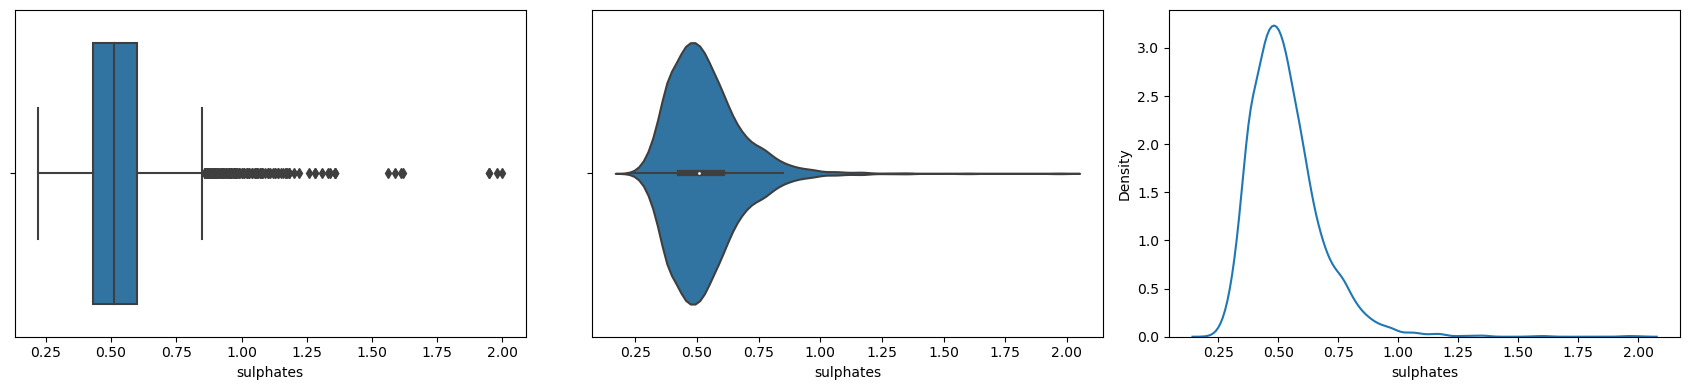

ALCOHOL
count of unique: 111


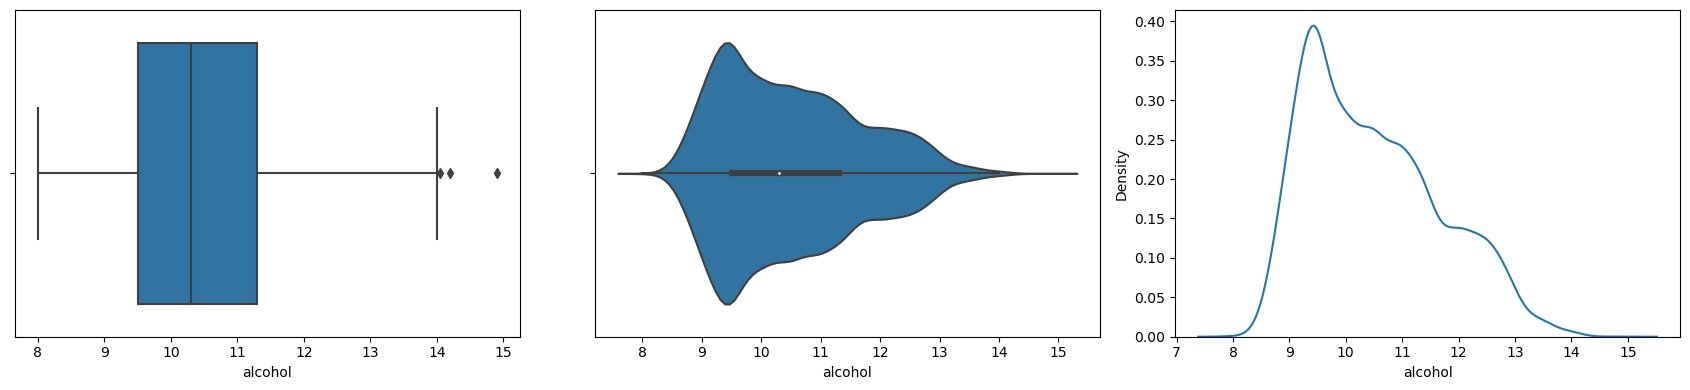

QUALITY
count of unique: 7


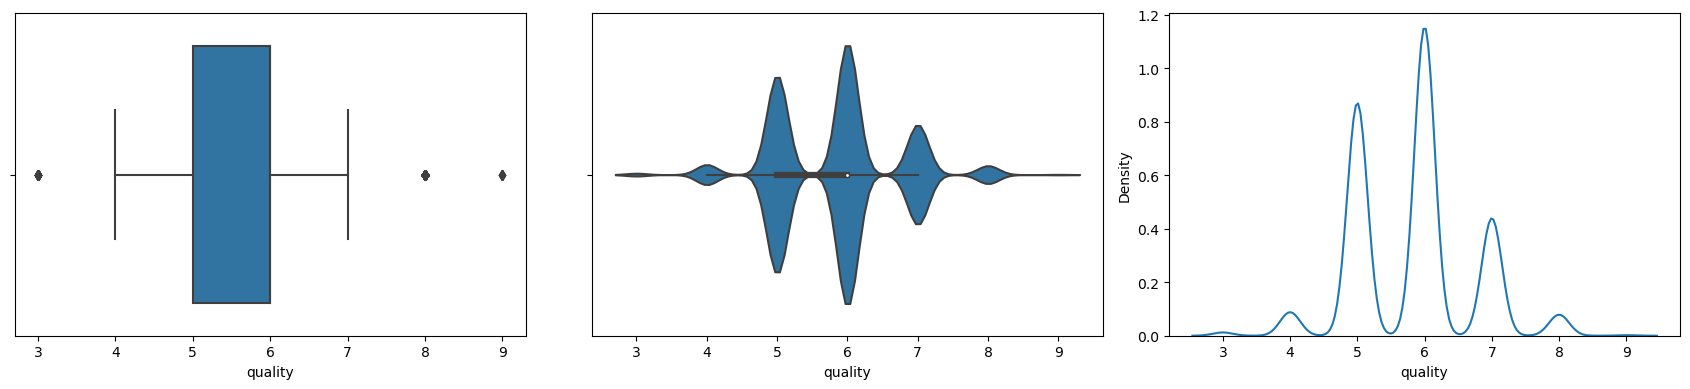

In [10]:
winey = wines.drop(columns='Wine_Color')
for col in winey:
    print(col.upper())
    print("count of unique:",wines[col].nunique())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
    sns.boxplot(data= wines, x=col, ax=ax[0])
    sns.violinplot(data= wines, x=col, ax=ax[1])
    sns.kdeplot(wines, x=col, ax=ax[2])
    plt.tight_layout()
    plt.show()

<h3><b>Univariate Questions

Are any of the features correlated? Can I apply some sort of feature selection?\
Should I look at the top 'x' best and bottom 'x' worst wines for comparison? Is that a way to gain perspective?\
The range of quality is 0-10. Very few low and top quality wines. A lot of middle-quality wines in the lot.\
Classification or regression? Should I do both for a comparison given the time I have to work on this?\
Are all input variables relevant?\
Initial Hypothesis:
- Low PH and low acidity contributes to higher quality.
- Alcohol has no affect on quality.
- Chlorides and Residual sugar have zero contribution to quality.

In [11]:
from wrangle import split_data
train, validate, test = split_data(wines)
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,0
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,0
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,0
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,0
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,0


In [12]:
train.shape, validate.shape, test.shape

((3637, 13), (1560, 13), (1300, 13))

In [13]:
train_corr = train.corr()
train_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
fixed_acidity,1.000000,0.226774,0.332317,-0.098034,0.297309,-0.290925,-0.337785,0.469931,-0.246691,0.299713,-0.091762,-0.065368,0.504100
volatile_acidity,0.226774,1.000000,-0.376408,-0.188824,0.364244,-0.364023,-0.419476,0.278780,0.268714,0.239365,-0.034203,-0.269760,0.650650
citric_acid,0.332317,-0.376408,1.000000,0.164637,0.046777,0.143539,0.198261,0.115682,-0.343603,0.061157,-0.017344,0.088984,-0.171954
residual_sugar,-0.098034,-0.188824,0.164637,1.000000,-0.120803,0.395073,0.490215,0.552325,-0.267587,-0.181494,-0.346102,-0.035653,-0.343182
chlorides,0.297309,0.364244,0.046777,-0.120803,1.000000,-0.188216,-0.271326,0.361243,0.047180,0.400766,-0.248475,-0.203906,0.503332
free_sulfur_dioxide,-0.290925,-0.364023,0.143539,0.395073,-0.188216,1.000000,0.722103,0.006237,-0.149522,-0.210375,-0.178417,0.062509,-0.479260
total_sulfur_dioxide,-0.337785,-0.419476,0.198261,0.490215,-0.271326,0.722103,1.000000,0.016123,-0.250628,-0.290576,-0.267613,-0.039081,-0.706561
density,0.469931,0.278780,0.115682,0.552325,0.361243,0.006237,0.016123,1.000000,0.020165,0.272256,-0.665954,-0.305751,0.401096
pH,-0.246691,0.268714,-0.343603,-0.267587,0.047180,-0.149522,-0.250628,0.020165,1.000000,0.201981,0.118596,0.006245,0.336759
sulphates,0.299713,0.239365,0.061157,-0.181494,0.400766,-0.210375,-0.290576,0.272256,0.201981,1.000000,-0.008089,0.026576,0.497376


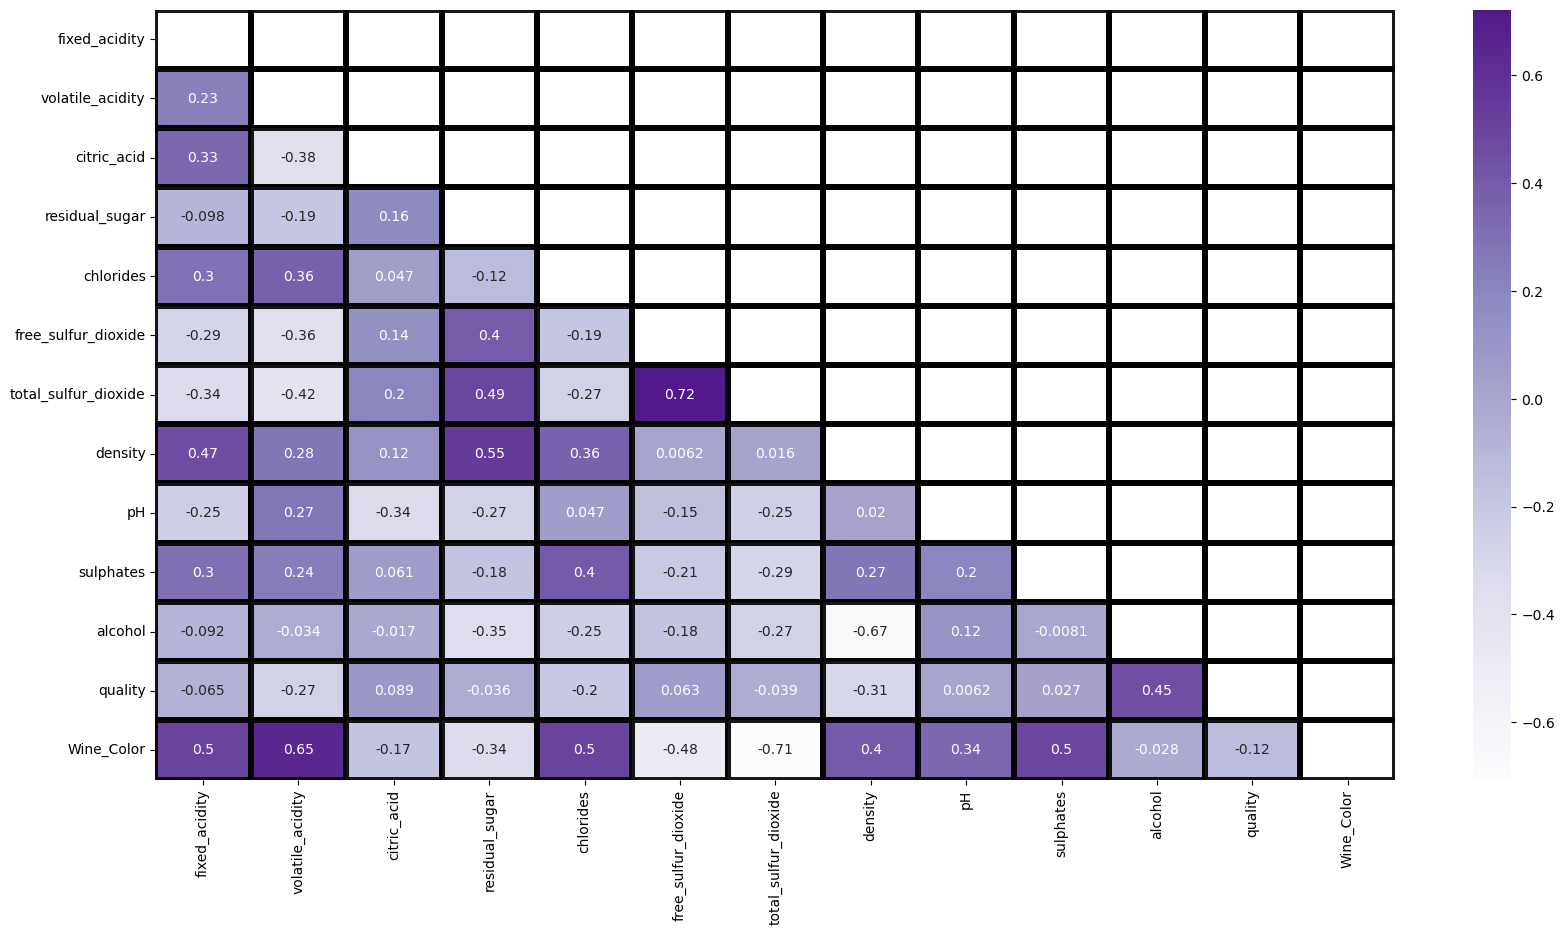

In [14]:
# Pass my correlation matrix to Seaborn's heatmap.
kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}
plt.figure(figsize=(20,10))
sns.heatmap(train_corr, cmap='Purples', annot=True, mask= np.triu(train_corr), **kwargs)
#plt.ylim(10, 10)

plt.show()

<b>HeatMap Takeaways:

 ><b> Biggest Correlation\
    - alcohol (0.45)
    

 ><b> Mid Correlations\
    - citric_acid (0.089)\
    - free_sulfur_dioxide (0.063)\
    - sulphates (0.27)\
    - ph (0.0062)
    

 ><b> Lowest Correlations\
    - residual_sugar (-0.036)\
    - total_sulfur_dioxide (-0.039)\
    - fixed_acidity (-0.065)\
    - chlorides (-0.2)\
    - volatile_acidity (-0.27)\
    - Density (-0.31)

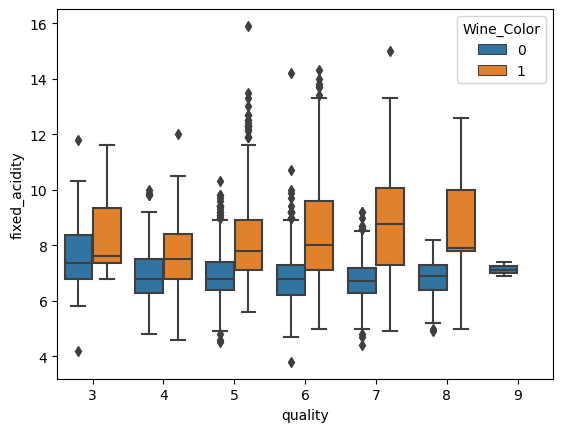

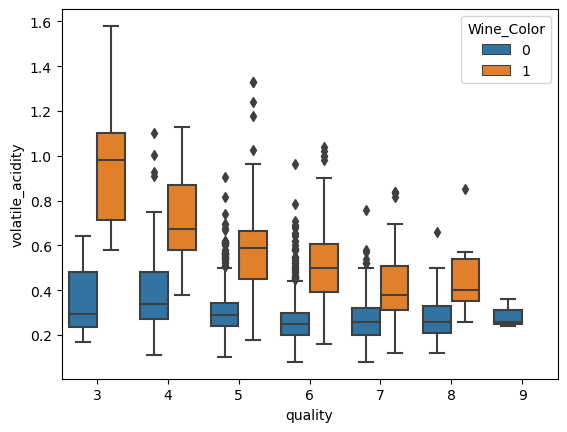

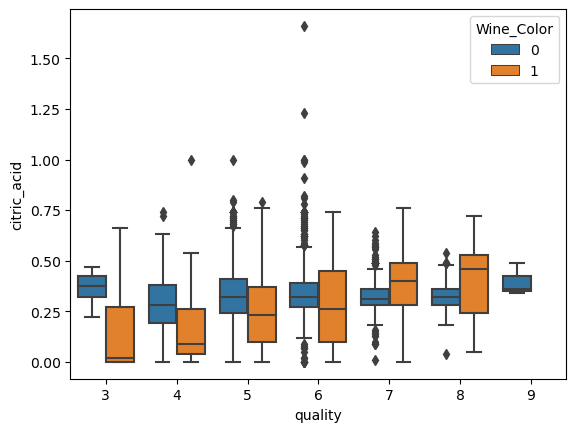

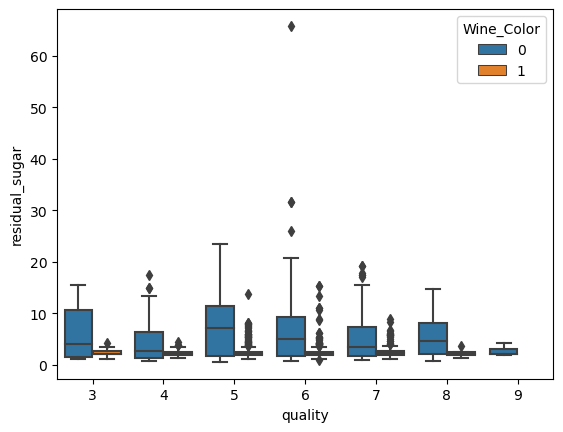

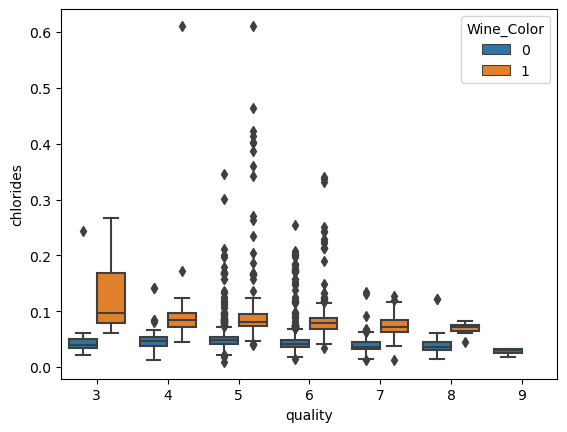

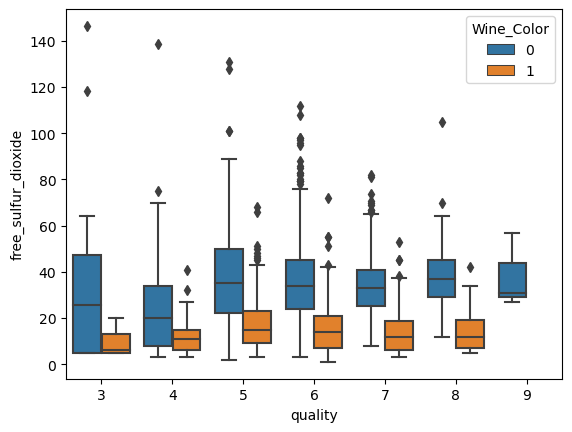

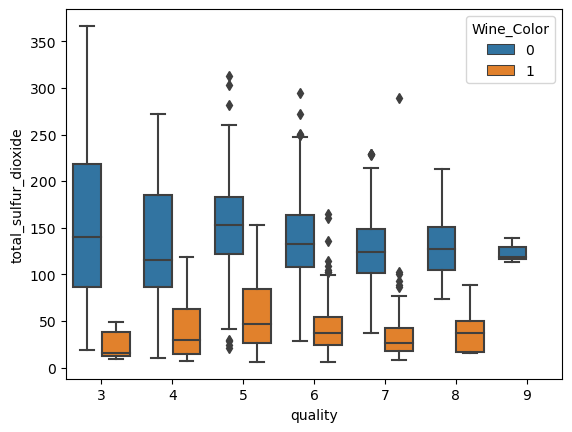

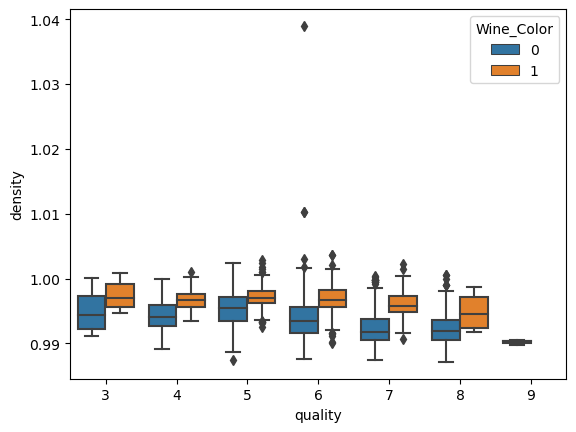

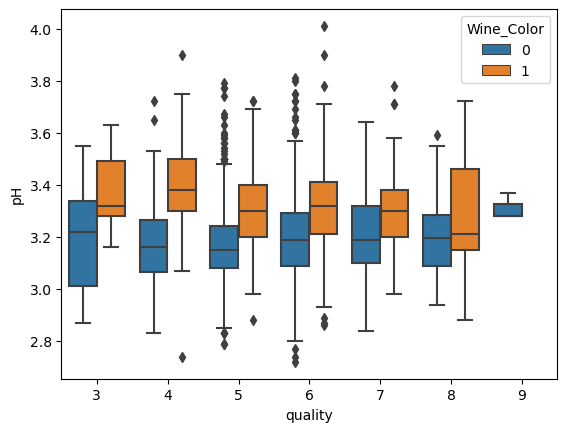

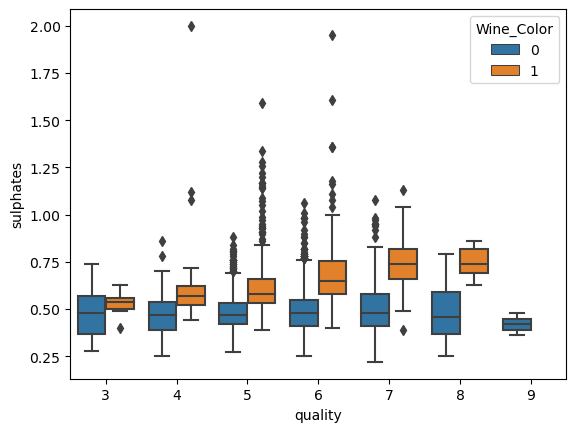

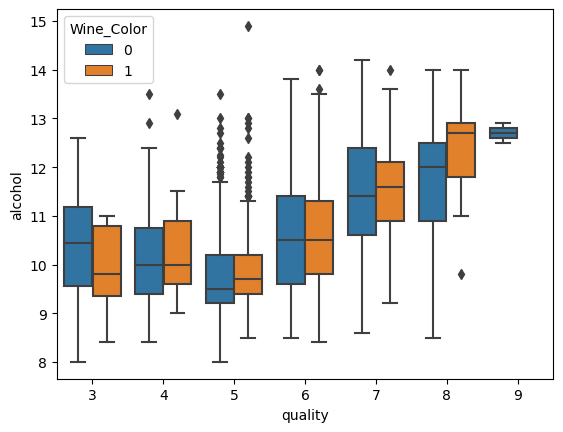

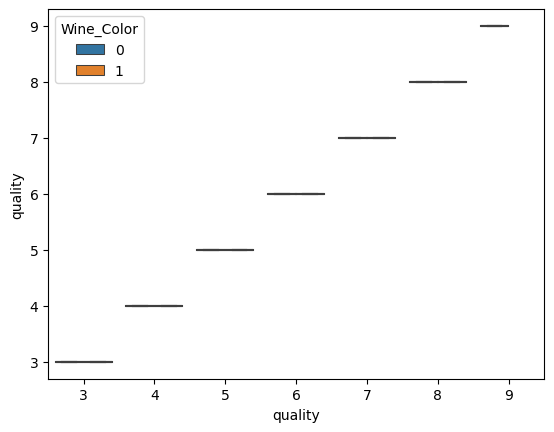

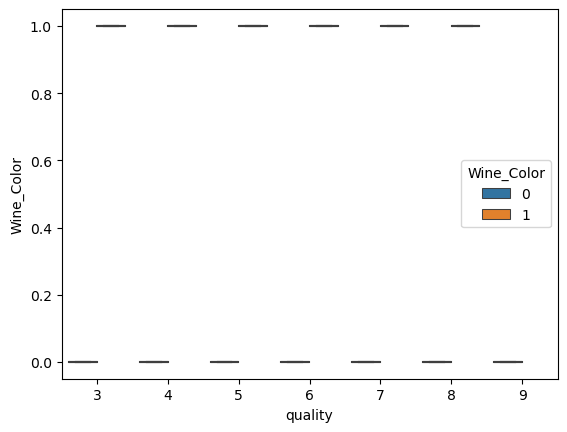

In [15]:
for col in train:
    sns.boxplot(data = train, y = col, x = train.quality, hue='Wine_Color')
    plt.show()

In [16]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Wine_Color'],
      dtype='object')

In [17]:
big_players = train[['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'sulphates', 'pH', 'quality']]

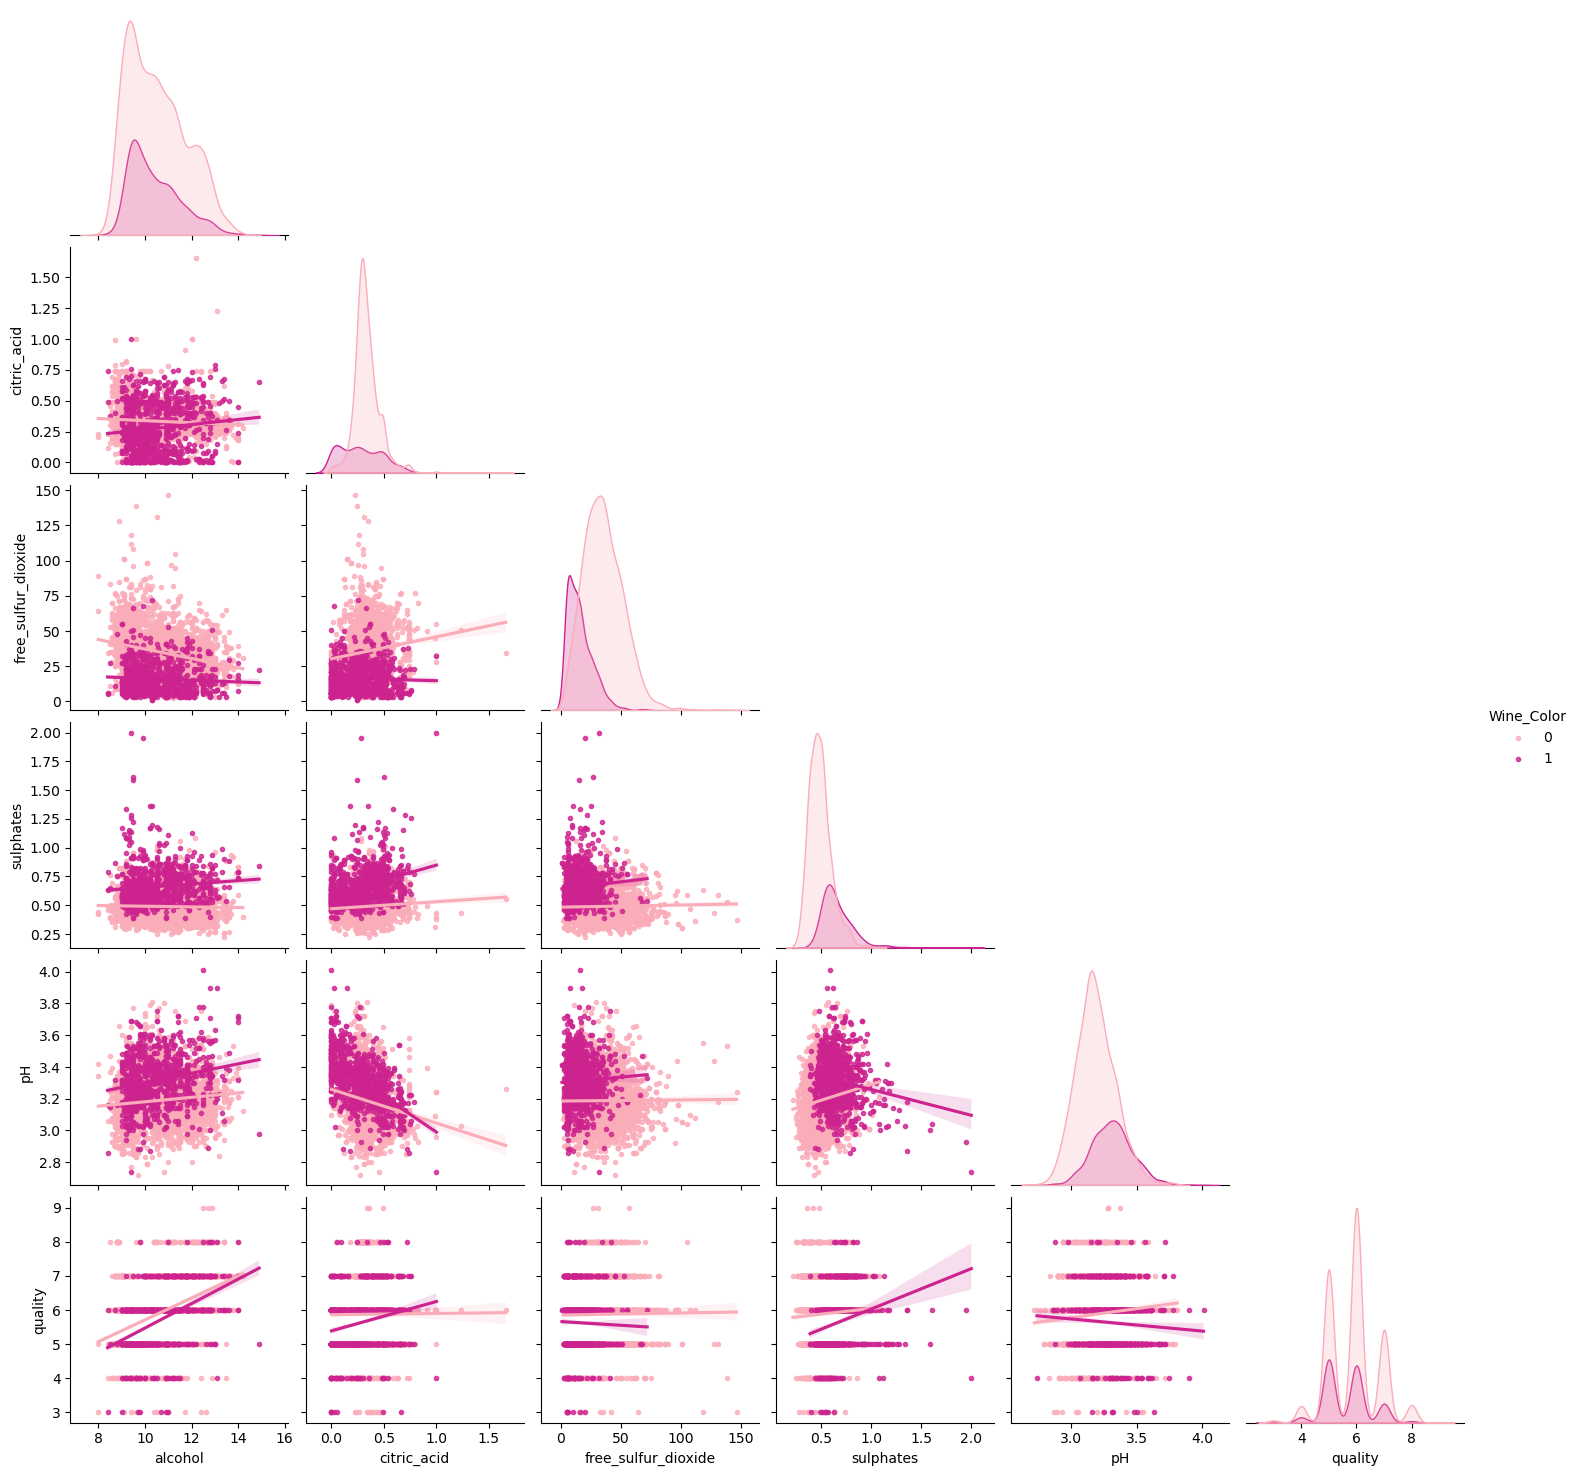

In [18]:
sns.pairplot(data = train, vars=big_players, hue = 'Wine_Color', markers='.', corner=True, kind='reg', palette='RdPu')
plt.show()

> <h3><b> Multivariate Analysis Takeaways

- 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'sulphates', and 'pH' all have a mid to high correlation with 'quality' (alcohol is the highest by far) per the heatmap.
- The bar chart shows that lower levels of volatile acidity is found in higher quality 'red' and 'white' wines, although more noticeably in the former.
- The bar chart shows that higher levels of sulfates are found in higher quality 'red' wines

<h2><b>Statistical Testing for Correlation


<div class="alert alert-warning" role="alert">
  <b>Question 1: Is there a relationship between quality and alcohol?
</div>

<Axes: xlabel='quality', ylabel='alcohol'>

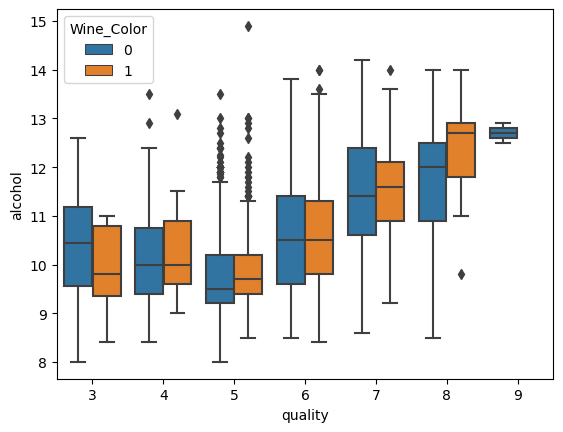

In [19]:
sns.boxplot(data=train, x='quality', y='alcohol', hue='Wine_Color')

In [20]:
relationship_null = 'There is no relationship between "quality" and "alcohol"'
relationship_alternative = 'There IS a relationship between "quality" and "alcohol"'

alpha = 0.05

In [21]:
#stats.levene
stats.levene(train['quality'], train['alcohol'])

LeveneResult(statistic=482.05058196445685, pvalue=1.6626261567358687e-103)

In [22]:
t, p = stats.ttest_ind(train['quality'], train['alcohol'], equal_var=False)
t, p

(-188.83011475353567, 0.0)

In [23]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "alcohol"


    
<div class="alert alert-warning" role="alert">
  <b>Question 2: Is there a relationship between quality and free_sulfur_dioxide?
</div>

<Axes: xlabel='free_sulfur_dioxide', ylabel='quality'>

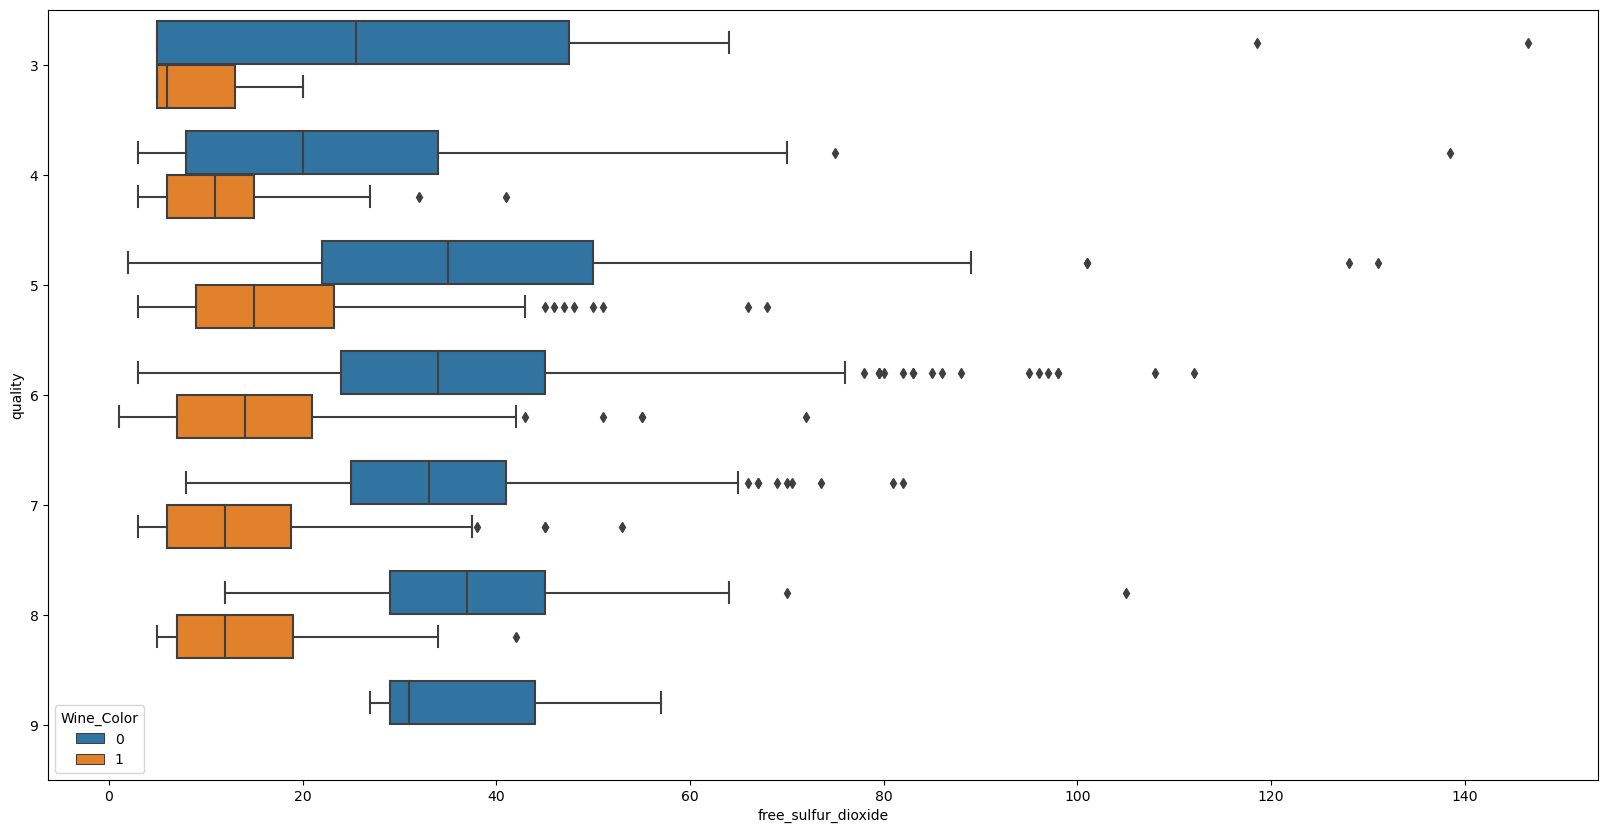

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data=train, x='free_sulfur_dioxide', y='quality', hue='Wine_Color', orient='h')

In [25]:
relationship_null = 'There is no relationship between "quality" and "free_sulfur_dioxide"'
relationship_alternative = 'There IS a relationship between "quality" and "free_sulfur_dioxide"'

alpha = 0.05

In [26]:
#stats.levene
stats.levene(train['quality'], train['free_sulfur_dioxide'])

LeveneResult(statistic=5479.937134632655, pvalue=0.0)

In [27]:
t, p = stats.ttest_ind(train['quality'], train['free_sulfur_dioxide'], equal_var=False)
t, p

(-84.65799104537766, 0.0)

In [28]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "free_sulfur_dioxide"


    
<div class="alert alert-warning" role="alert">
    <b>Question 3: Is there a relationship between quality and sulphates?
</div>

<Axes: xlabel='sulphates', ylabel='quality'>

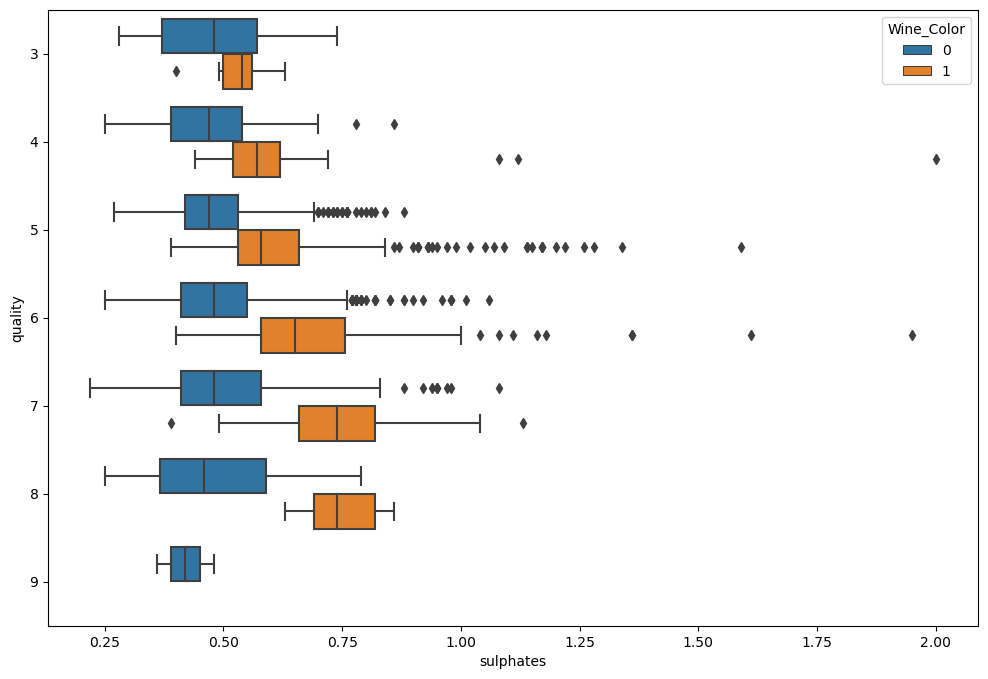

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='sulphates', y='quality', hue='Wine_Color', orient='h')

In [30]:
relationship_null = 'There is no relationship between "quality" and "sulphates"'
relationship_alternative = 'There IS a relationship between "quality" and "sulphates"'

alpha = 0.05

In [31]:
#stats.levene
stats.levene(train['quality'], train['sulphates'])

LeveneResult(statistic=2714.025556143649, pvalue=0.0)

In [32]:
t, p = stats.ttest_ind(train['quality'], train['sulphates'], equal_var=False)
t, p

(355.1655807633573, 0.0)

In [33]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "sulphates"



    
<div class="alert alert-warning" role="alert">
    <b>Question 4: Is there a relationship between quality and pH?
</div>

<Axes: xlabel='pH', ylabel='quality'>

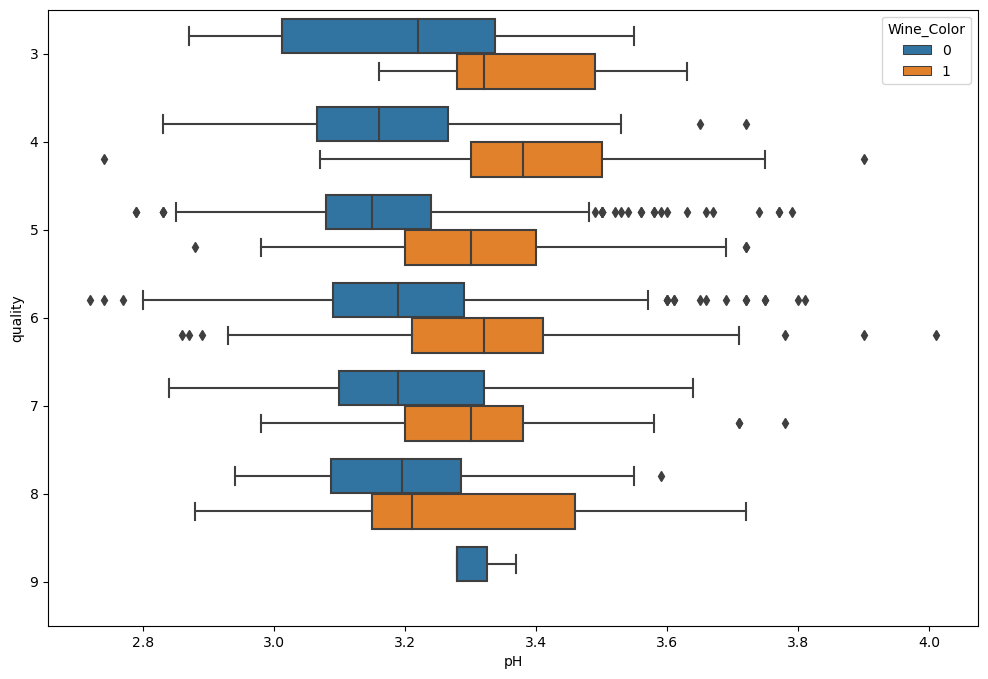

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='pH', y='quality', hue='Wine_Color', orient='h')

In [35]:
relationship_null = 'There is no relationship between "quality" and "pH"'
relationship_alternative = 'There IS a relationship between "quality" and "pH"'

alpha = 0.05

In [36]:
#stats.levene
stats.levene(train['quality'], train['pH'])

LeveneResult(statistic=2534.0080196855356, pvalue=0.0)

In [37]:
t, p = stats.ttest_ind(train['quality'], train['pH'], equal_var=False)
t, p

(173.95770286817077, 0.0)

In [38]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "pH"



    
<div class="alert alert-warning" role="alert">
    <b>Question 5: Is there a relationship between quality and citric_acid?
</div>

<Axes: xlabel='citric_acid', ylabel='quality'>

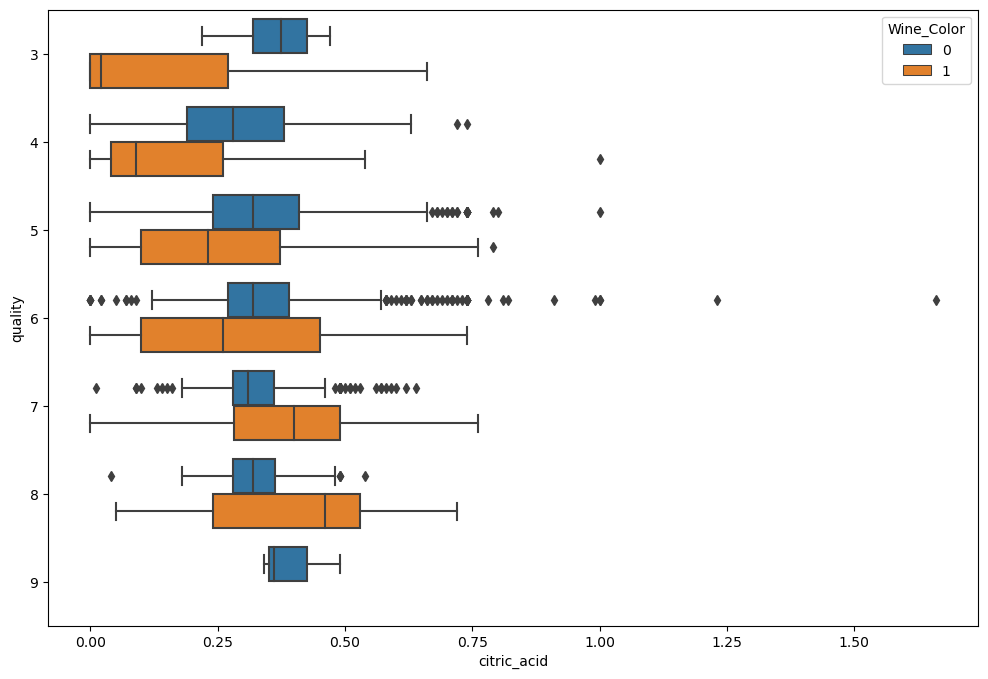

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='citric_acid', y='quality', hue='Wine_Color', orient='h')

In [40]:
relationship_null = 'There is no relationship between "quality" and "citric_acid"'
relationship_alternative = 'There IS a relationship between "quality" and "citric_acid"'

alpha = 0.05

In [41]:
#stats.levene
stats.levene(train['quality'], train['citric_acid'])

LeveneResult(statistic=2726.802700009096, pvalue=0.0)

In [42]:
t, p = stats.ttest_ind(train['quality'], train['citric_acid'], equal_var=False)
t, p

(369.59366802357266, 0.0)

In [43]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "citric_acid"


<h2><b>Modeling

<h4><b>Let's look at 'citric_acid' & 'pH'

In [44]:
X = train[['citric_acid', 'pH']]

# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([2, 0, 0, ..., 1, 0, 1], dtype=int32)

> <b>Add Clusters to original train data:

In [45]:
# make a new column names cluster in wines and X dataframe

train['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,0,2
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,0,0
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,0,0
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,0,0
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,0,2


In [46]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[0.28854154, 3.12205538],
       [0.22885029, 3.39212572],
       [0.5186924 , 3.15481943]])

In [47]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,citric_acid,pH
0,0.288542,3.122055
1,0.228850,3.392126
2,0.518692,3.154819


In [48]:
#  Find the mean of the original df and groupby cluster

train.groupby('cluster')['citric_acid', 'pH'].mean()

,citric_acid,pH
cluster,,
0,0.289193,3.121688
1,0.228392,3.391558
2,0.518939,3.155156


In [49]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([2, 0, 0, ..., 1, 0, 1], dtype=int32)

In [50]:
train['cluster'] = train.cluster
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,0,2
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,0,0
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,0,0
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,0,0
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,0,2


<Figure size 1400x900 with 0 Axes>

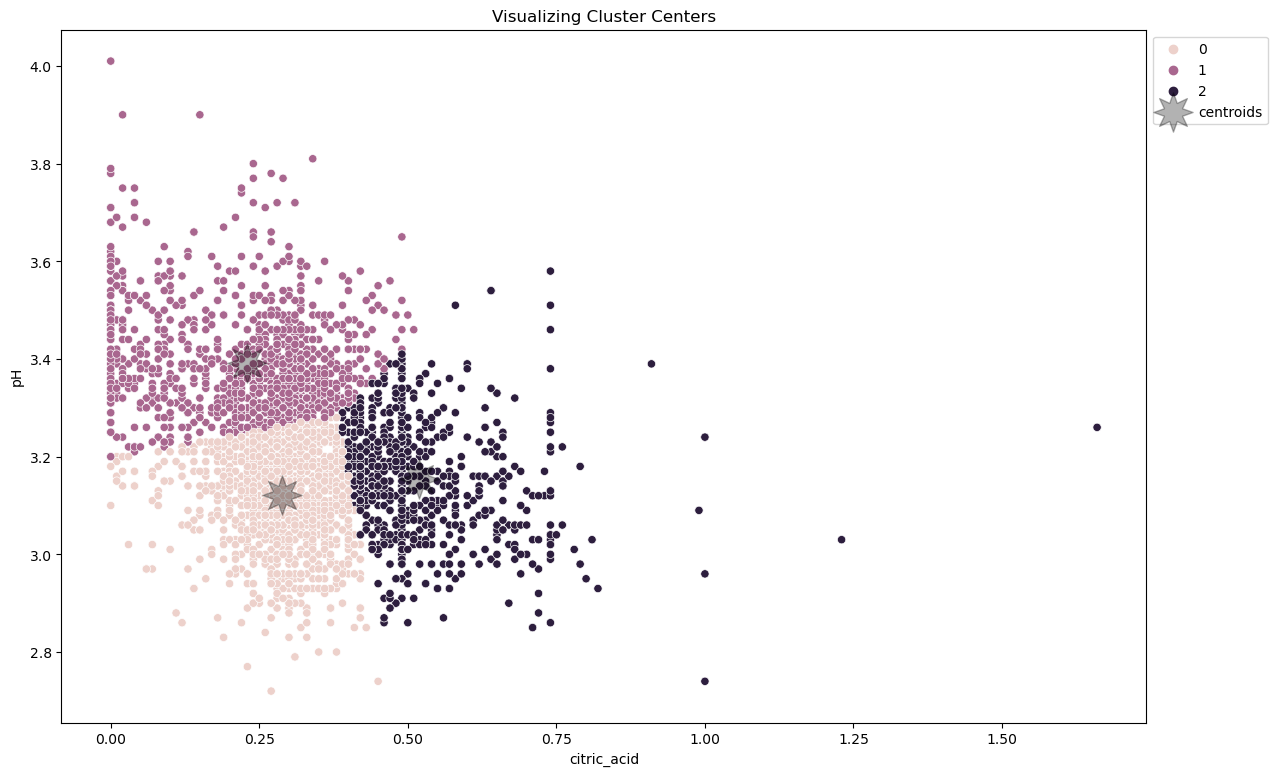

In [51]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'citric_acid', y = 'pH', data = train, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'citric_acid', y = 'pH', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

<h4><b>Elbow method to choose K

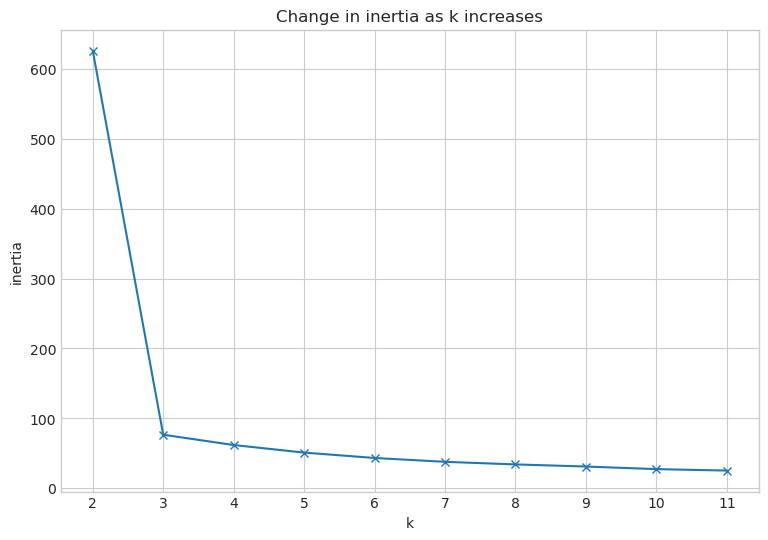

In [52]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

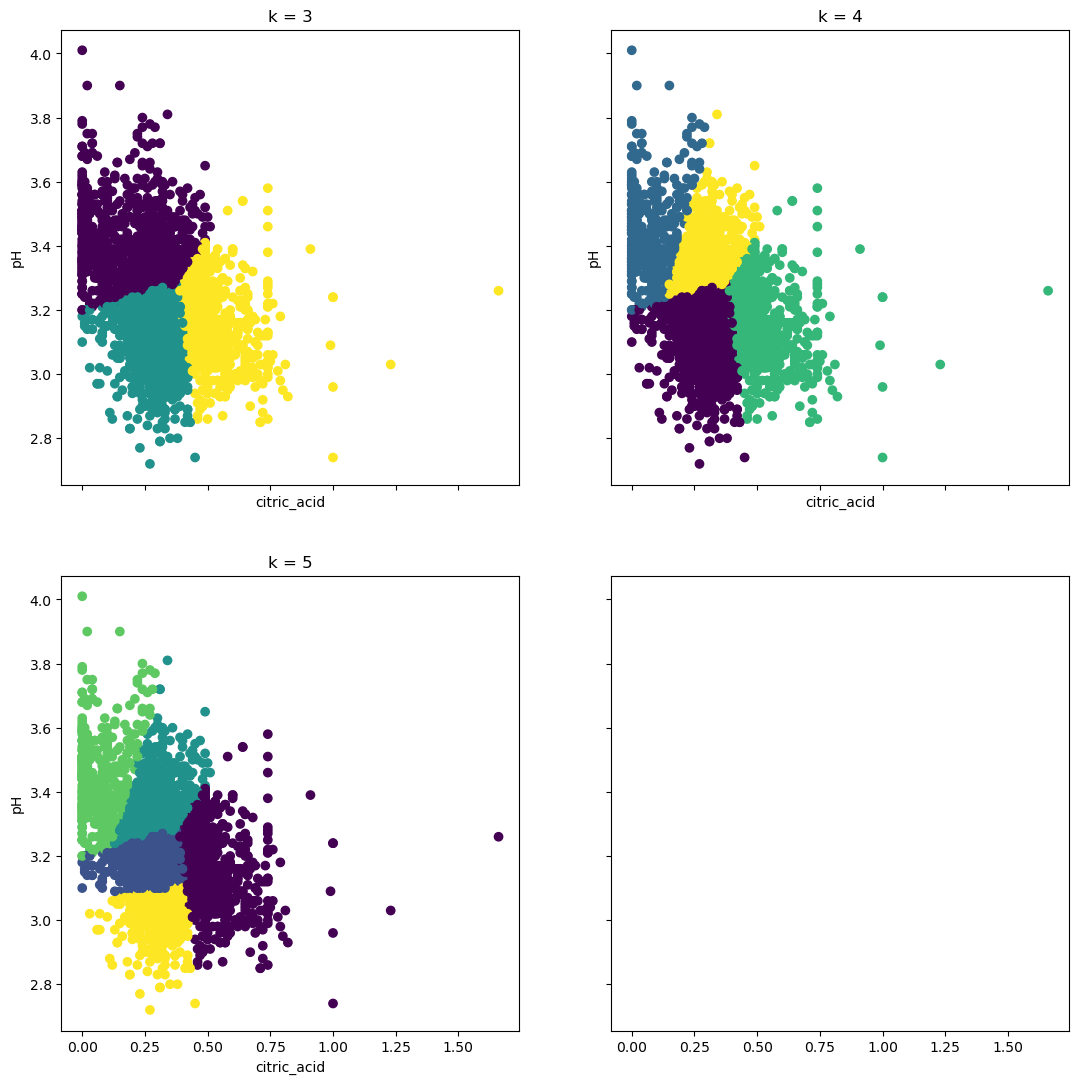

In [53]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.citric_acid, X.pH, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='citric_acid', ylabel='pH')

<h4><b>Let's look at 'sulphates' and 'free sulfur dioxide'

In [54]:
X2 = train[['sulphates', 'free_sulfur_dioxide']]

# MAKE the thing
kmeans2 = KMeans(n_clusters=3)

# FIT the thing
kmeans2.fit(X2)

# USE (predict using) the thing 
kmeans2.predict(X2)

array([0, 1, 1, ..., 1, 2, 1], dtype=int32)

> <b>Add Clusters to original train data:

In [55]:
# make a new column names cluster in wines and X dataframe

train['cluster2'] = kmeans2.predict(X2)

X2['cluster2'] = kmeans2.predict(X2)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster,cluster2
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,0,2,0
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,0,0,1
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,0,0,1
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,0,0,0
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,0,2,0


In [56]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans2.cluster_centers_

array([[ 0.49576869, 57.35049365],
       [ 0.51104194, 33.5612713 ],
       [ 0.57421541, 13.76212553]])

In [57]:
# Make a dataframe 

centroids2 = pd.DataFrame(kmeans2.cluster_centers_, columns = X2.columns[:2])
centroids2

,sulphates,free_sulfur_dioxide
0,0.495769,57.350494
1,0.511042,33.561271
2,0.574215,13.762126


In [58]:
#  Find the mean of the original df and groupby cluster

train.groupby('cluster2')['sulphates', 'free_sulfur_dioxide'].mean()

,sulphates,free_sulfur_dioxide
cluster2,,
0,0.495769,57.350494
1,0.511042,33.561271
2,0.574215,13.762126


In [59]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([2, 0, 0, ..., 1, 0, 1], dtype=int32)

In [60]:
train['cluster2'] = train.cluster2
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster,cluster2
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,0,2,0
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,0,0,1
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,0,0,1
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,0,0,0
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,0,2,0


<Figure size 1400x900 with 0 Axes>

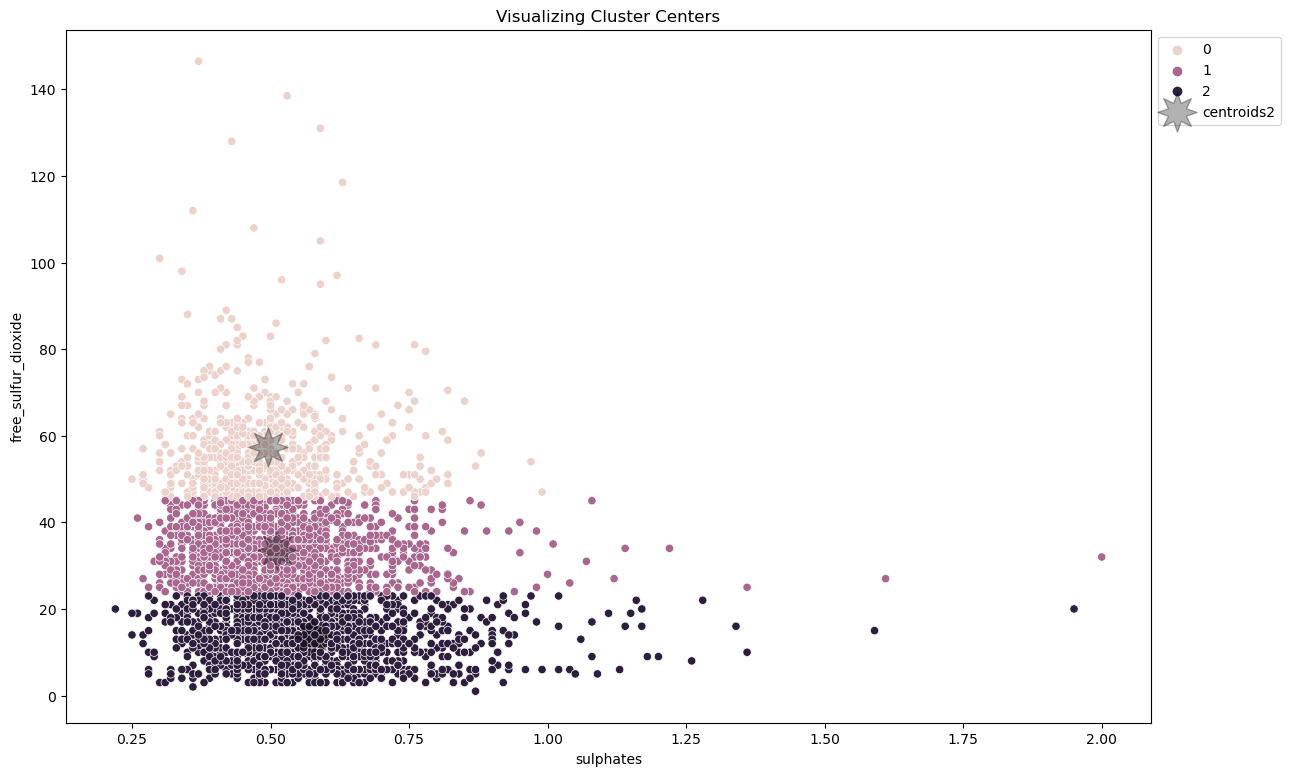

In [61]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'sulphates', y = 'free_sulfur_dioxide', data = train, hue = 'cluster2')


# plot cluster centers (centroids)
centroids2.plot.scatter(x = 'sulphates', y = 'free_sulfur_dioxide', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids2')


plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster2'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster2 {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

<h4><b>Elbow method to choose K

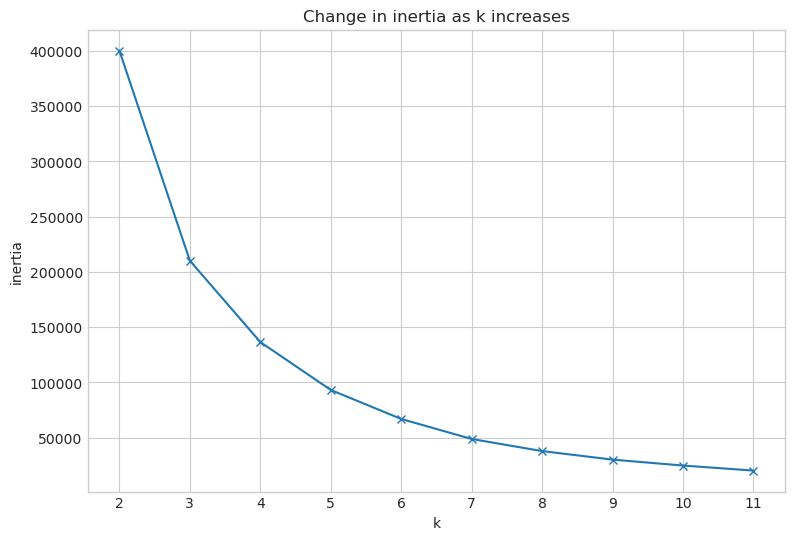

In [62]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

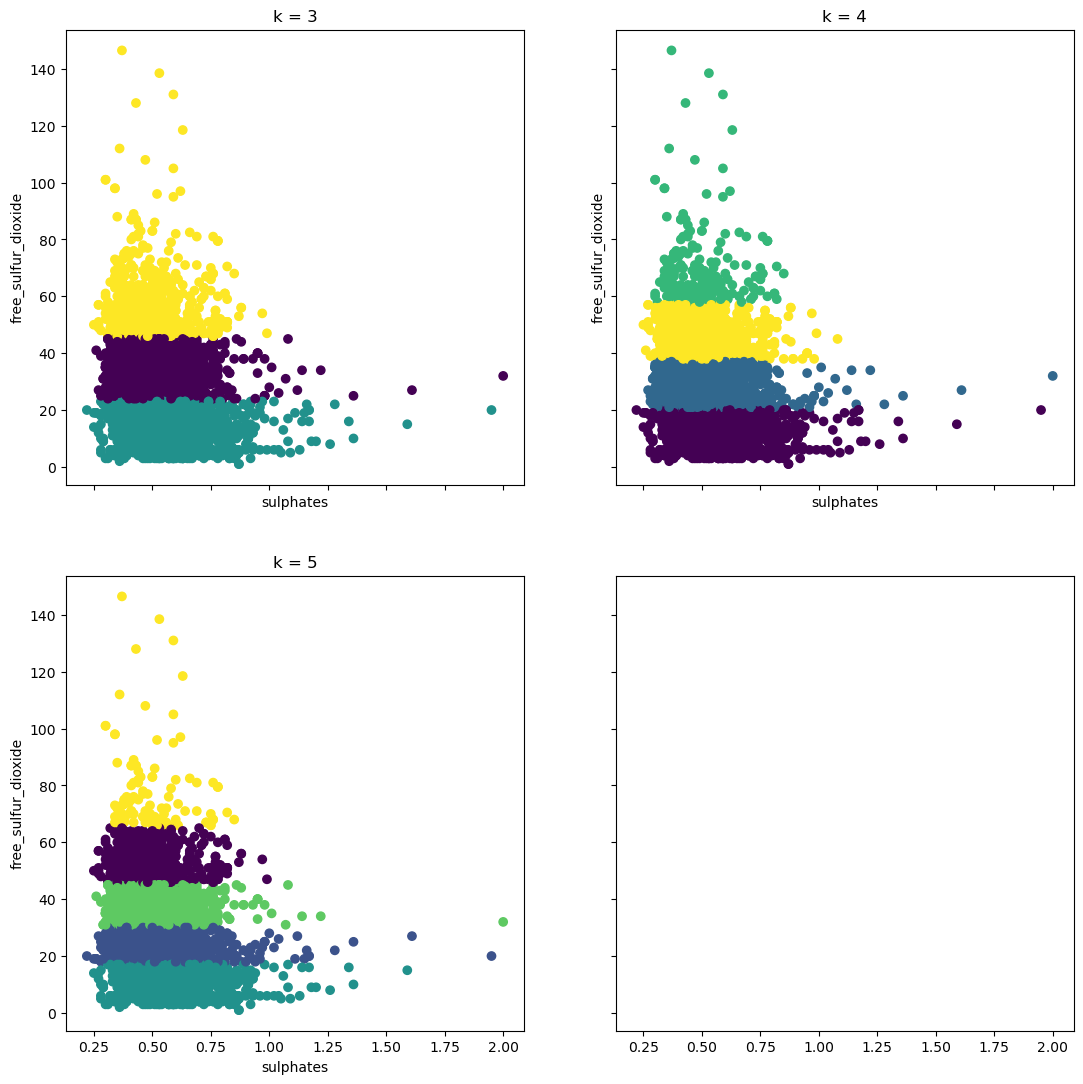

In [63]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 6)):
    
    clusters = KMeans(k).fit(X2).predict(X2)
    
    ax.scatter(X2.sulphates, X2.free_sulfur_dioxide, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='sulphates', ylabel='free_sulfur_dioxide')

<h4><b>Let's look at 'free_sulfur_dioxide' & 'alcohol'

In [64]:
X3 = train[['free_sulfur_dioxide', 'alcohol']]

# MAKE the thing
kmeans3 = KMeans(n_clusters=3)

# FIT the thing
kmeans3.fit(X3)

# USE (predict using) the thing 
kmeans3.predict(X3)

array([2, 0, 0, ..., 0, 1, 0], dtype=int32)

> <b>Add Clusters to original train data:

In [65]:
# make a new column names cluster in wines and X dataframe

train['cluster3'] = kmeans3.predict(X3)

X3['cluster3'] = kmeans3.predict(X3)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster,cluster2,cluster3
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,0,2,0,2
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,0,0,1,0
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,0,0,1,0
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,0,0,0,2
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,0,2,0,2


In [66]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans3.cluster_centers_

array([[32.51687216, 10.64362751],
       [13.19568509, 10.61175877],
       [56.29741935,  9.99298925]])

In [67]:
# Make a dataframe 

centroids3 = pd.DataFrame(kmeans.cluster_centers_, columns = X3.columns[:2])
centroids3

,free_sulfur_dioxide,alcohol
0,0.288542,3.122055
1,0.228850,3.392126
2,0.518692,3.154819


In [68]:
#  Find the mean of the original df and groupby cluster

train.groupby('cluster3')['free_sulfur_dioxide', 'alcohol'].mean()

,free_sulfur_dioxide,alcohol
cluster3,,
0,32.516872,10.643628
1,13.195685,10.611759
2,56.297419,9.992989


In [69]:
# Labels (same as from predict) for each observation

kmeans3.labels_

array([2, 0, 0, ..., 0, 1, 0], dtype=int32)

In [70]:
train['cluster3'] = train.cluster3
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster,cluster2,cluster3
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,0,2,0,2
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,0,0,1,0
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,0,0,1,0
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,0,0,0,2
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,0,2,0,2


<Figure size 1400x900 with 0 Axes>

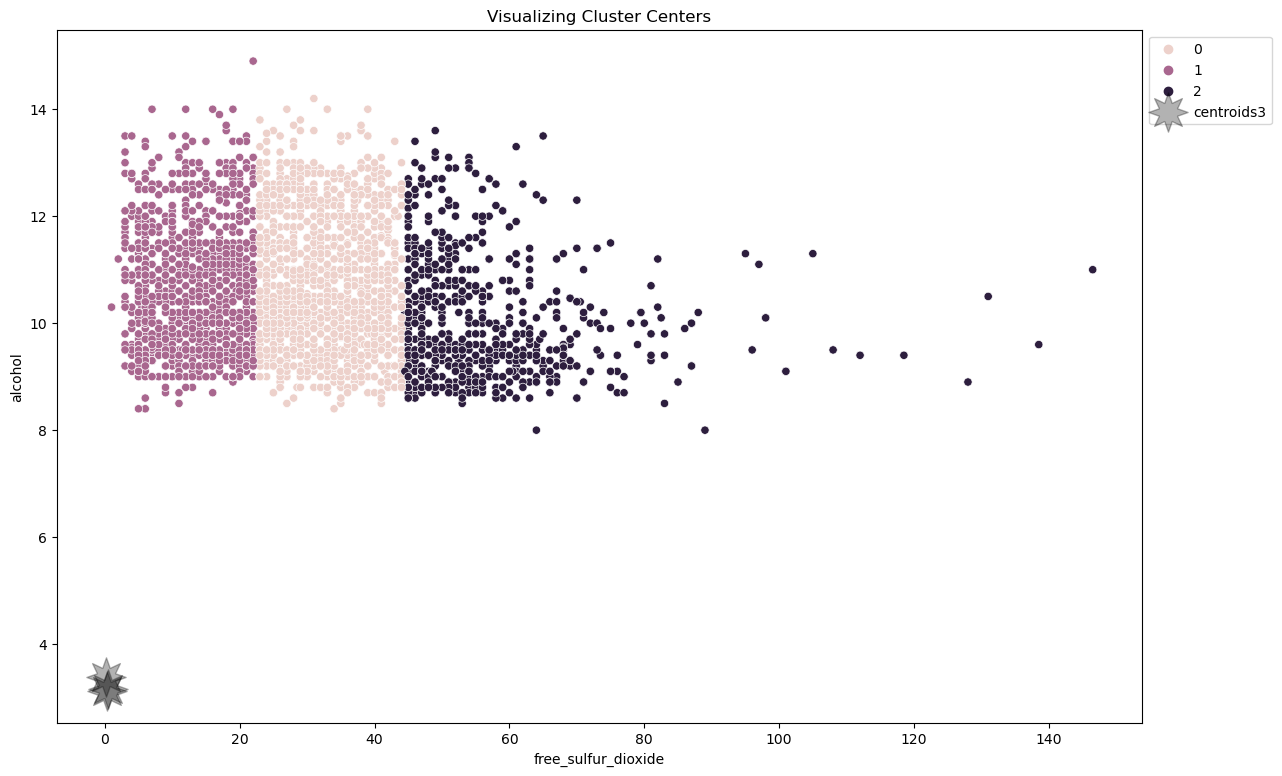

In [71]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'free_sulfur_dioxide', y = 'alcohol', data = train, hue = 'cluster3')


# plot cluster centers (centroids)
centroids3.plot.scatter(x = 'free_sulfur_dioxide', y = 'alcohol', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids3')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster3'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster3 {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

<h4><b>Elbow method to choose K

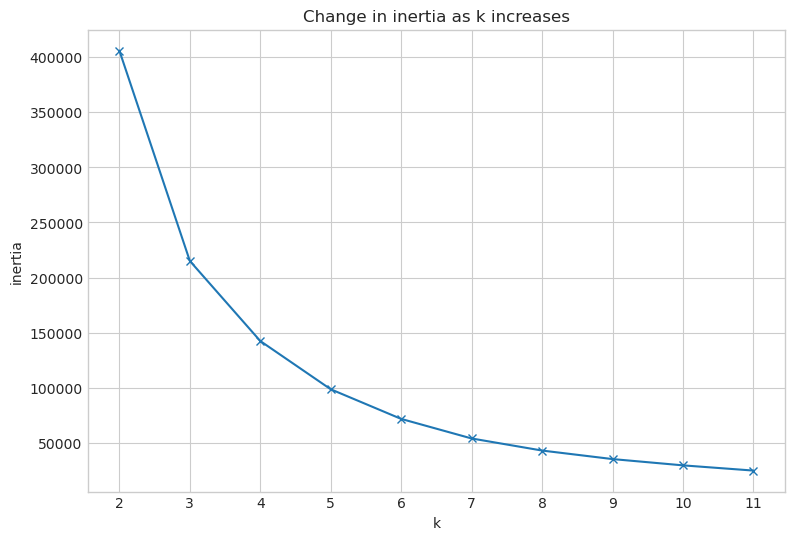

In [72]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

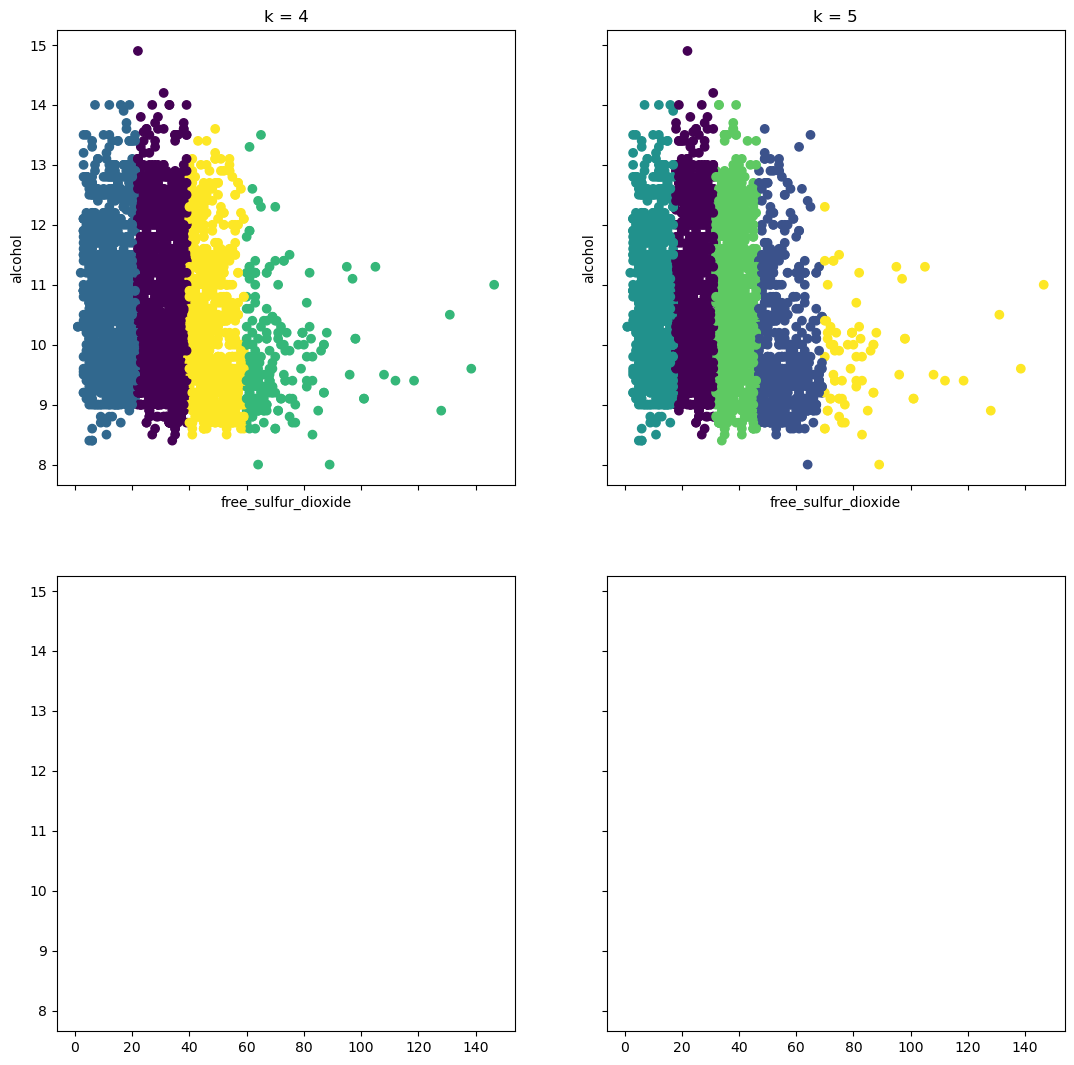

In [73]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(4, 6)):
    
    clusters = KMeans(k).fit(X3).predict(X3)
    
    ax.scatter(X3.free_sulfur_dioxide, X3.alcohol, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='free_sulfur_dioxide', ylabel='alcohol')

<h2><b>Prepare the Data for Regression Analysis

> <b>Call up a fresh dataframe, wrangle it, split it, and encode the Wine_Color column.

In [74]:
wines = pd.concat(frames)
wines = wines.rename(columns=({'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}))
from wrangle import split_data
train, validate, test = split_data(wines)

In [75]:
train['Wine_Color'] = train.Wine_Color.map({'Red Wine': 1, 'White Wine': 0})
validate['Wine_Color'] = validate.Wine_Color.map({'Red Wine': 1, 'White Wine': 0})
test['Wine_Color'] = test.Wine_Color.map({'Red Wine': 1, 'White Wine': 0})

> <b>Scale the data

In [76]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,NaN
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,NaN
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,NaN
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,NaN
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,NaN


In [77]:
continuous_features = ['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'alcohol'] # The values in these columns need to be scaled

In [78]:
# make an object:
scaler = MinMaxScaler()

In [79]:
# fit the thing
# if you are using an sklearn object, make sure you only call fit on train!
scaler.fit(train[continuous_features])

MinMaxScaler()

In [80]:
# Use the thing
train[['fixed_acidity_scaled', 'residual_sugar_scaled', 'free_sulfur_dioxide_scaled', 'total_sulfur_dioxide_scaled', 'pH_scaled', 'alcohol_scaled']] = scaler.transform(train[continuous_features])

In [81]:
train.head() ##### The values have been scaled.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,fixed_acidity_scaled,residual_sugar_scaled,free_sulfur_dioxide_scaled,total_sulfur_dioxide_scaled,pH_scaled,alcohol_scaled
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,NaN,0.272727,0.015337,0.439863,0.316227,0.193798,0.173913
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,NaN,0.223140,0.105828,0.226804,0.352288,0.387597,0.217391
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,NaN,0.214876,0.102761,0.206186,0.418863,0.410853,0.159420
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,NaN,0.247934,0.073620,0.357388,0.380028,0.294574,0.434783
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,NaN,0.247934,0.208589,0.343643,0.438280,0.310078,0.231884


In [86]:
#### Now to drop the columns that are not needed for the Machine Learning algorithms
preprocessed_train = train.drop(columns=['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'alcohol', 'Wine_Color'])
preprocessed_train.head()

,volatile_acidity,citric_acid,chlorides,density,sulphates,quality,fixed_acidity_scaled,residual_sugar_scaled,free_sulfur_dioxide_scaled,total_sulfur_dioxide_scaled,pH_scaled,alcohol_scaled
3737,0.21,0.72,0.167,0.99324,0.51,5,0.272727,0.015337,0.439863,0.316227,0.193798,0.173913
19,0.31,0.14,0.044,0.99550,0.50,5,0.223140,0.105828,0.226804,0.352288,0.387597,0.217391
2200,0.24,0.23,0.069,0.99620,0.53,5,0.214876,0.102761,0.206186,0.418863,0.410853,0.159420
4139,0.18,0.35,0.054,0.99287,0.54,7,0.247934,0.073620,0.357388,0.380028,0.294574,0.434783
501,0.19,0.58,0.038,0.99750,0.48,6,0.247934,0.208589,0.343643,0.438280,0.310078,0.231884


In [87]:
# Use the thing on Validate and Test
validate[['fixed_acidity_scaled', 'residual_sugar_scaled', 'free_sulfur_dioxide_scaled', 'total_sulfur_dioxide_scaled', 'pH_scaled', 'alcohol_scaled']] = scaler.transform(validate[continuous_features])
test[['fixed_acidity_scaled', 'residual_sugar_scaled', 'free_sulfur_dioxide_scaled', 'total_sulfur_dioxide_scaled', 'pH_scaled', 'alcohol_scaled']] = scaler.transform(test[continuous_features])

#### Now to drop the columns that are not needed for the Machine Learning algorithms
preprocessed_validate = validate.drop(columns=['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'alcohol'])
preprocessed_test = test.drop(columns=['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'alcohol'])


<h2><b>Regression Modeling

<b>Let's split up the train data between X and y

In [88]:
X = preprocessed_train.drop(columns={'quality'})
y = preprocessed_train['quality']

In [89]:
from sklearn.linear_model import LinearRegression

#make
lm = LinearRegression()
#fit
lm.fit(X,y)
#use
yhat = lm.predict(X)

<b>Establish the baseline

In [90]:
#Which method is best for the baseline?
baseline_mean = y.mean()
baseline_med = y.median()
baseline_mean, baseline_med

(5.810283200439923, 6.0)

In [91]:
y_pred = pd.DataFrame(
    {
    'y_act': y.values,
    'yhat' : yhat,
    'baseline_med': baseline_med,
    'baseline_mean': baseline_mean
    }, index=train.index)

In [92]:
# compute the error on these two baselines: I want the lower RSME for the baseline
mean_baseline_rmse = mean_squared_error(y_pred.baseline_mean, y) ** (1/2)
med_baseline_rmse = mean_squared_error(y_pred.baseline_med, y) ** (1/2)
mean_baseline_rmse < med_baseline_rmse

True

In [95]:
#Establish the true baseline
baseline = mean_baseline_rmse
baseline_rsme = mean_baseline_rmse

In [96]:
eval_df = pd.DataFrame([{
    'model': 'baseline',
    'rmse': baseline_rsme,
    'r2': baseline_r2
}])

NameError: name 'baseline_r2' is not defined

In [ ]:
eval_df

<b>Let's separate the feature and target

In [ ]:
# train set
X_train = preprocessed_validate.drop(columns=['quality']) 
y_train = preprocessed_validate['quality']

# validate set
X_val = preprocessed_validate.drop(columns=['quality']) 
y_val = preprocessed_validate['quality']

# test
X_test = preprocessed_test.drop(columns=['quality'])
y_test = preprocessed_test['quality']

<b>Feature Selection

In [ ]:
# make a model object to use in RFE process.
# The model is here to give us metrics on feature importance and model score
# allowing us to recursively reduce the number of features to reach our desired space
linear_model = LinearRegression()

# make a RFE object and fit
rfe = RFE(linear_model, n_features_to_select=3)
rfe.fit(X_train,y_train)

# get my top two features
X_train.columns[rfe.support_]

> <b>Transform out selected features into a dataframe

In [ ]:
X_train = pd.DataFrame(
    rfe.transform(X_train),
    index=X_train.index,
    columns = X_train.columns[rfe.support_]
)
X_train.head()

<b>Create subpots of distribution of the features

In [ ]:
X_train.plot.hist(subplots=True, layout=(1, 3), figsize=(8, 4),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()

<b><h1>Time to Model

<b><h3>Model 1: Ordinary Least Squares (OLS)

<b>Training

In [ ]:
# MAKE THE THING: create the model object
lr1 = LinearRegression()

#1. FIT THE THING: fit the model to training data
OLSmodel = linear_model.fit(X_train, y_train)

#2. USE THE THING: make a prediction
y_train_pred = linear_model.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train, y_train_pred) ** (.5) # 0.5 to get the root

# root mean squeared error
print("RMSE for OLS:",rmse_train)

In [ ]:
# convert results into dataframe
result = pd.DataFrame({
    "target": y_train,
    "OLS_prediction": y_train_pred,
    "baseline_pred": baseline
})

result.head()

<b>Validate

In [ ]:
# convert to dataframe
X_val = pd.DataFrame(X_val)
X_val[X_val.columns] = X_val
X_val = X_val[X_train.columns]

In [ ]:
#2. USE THE THING: make a prediction
y_val_pred = linear_model.predict(X_val)

#3. Evaluate: RMSE
rmse_val = mean_squared_error(y_val, y_val_pred) ** (.5) # 0.5 to get the root

# root mean squeared error
print("RMSE for OLS:",rmse_val)

In [ ]:
# convert results into dataframe
result = pd.DataFrame({
    "target": y_val,
    "OLS_val_predi":y_val_pred
})

result.head()

In [ ]:
# how important is each feature to the target
OLSmodel.coef_

In [ ]:
rfe.get_feature_names_out()

In [ ]:
print(f"OLS Regressor \nRMSE_train {rmse_train} \
\nRMSE_validate {rmse_val} \nR2_validate {explained_variance_score(y_val, y_val_pred)}")

<b><h3>Model 2: LassoLars

In [ ]:
# MAKE THE THING: create the model object
lars = LassoLars(alpha= 1.0)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
laslars = lars.fit(X_train, y_train)

#2. USE THE THING: make a prediction
y_train_pred_lars = lars.predict(X_train)

#3. Evaluate: RMSE
rmse_train_lars = mean_squared_error(y_train, y_train_pred_lars) ** (0.5)

# predict validate
y_val_pred_lars = lars.predict(X_val)

# evaluate: RMSE
rmse_val_lars = mean_squared_error(y_val, y_val_pred_lars) ** (0.5)

# how important is each feature to the target
laslars.coef_

print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train_lars}, 
Validation/Out-of-Sample:  {rmse_val_lars}
Difference:  {rmse_val_lars - rmse_train_lars}""")

<b><h3>Model 3: Generalized Linear Model (GLM)

In [ ]:
# Plot the distribution
y_train.hist()

# looks like a poisson distribution

In [ ]:
# MAKE THE THING: create the model object
glm_model = TweedieRegressor(alpha= 1.0, power= 1)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
tweedieReg = glm_model.fit(X_train, y_train)

#2. USE THE THING: make a prediction
y_train_pred_tweedie = glm_model.predict(X_train)

#3. Evaluate: RMSE
rmse_train_tweedie = mean_squared_error(y_train, y_train_pred_tweedie) ** (0.5)

# predict validate
y_val_pred_tweedie = glm_model.predict(X_val)

# evaluate: RMSE
rmse_val_tweedie = mean_squared_error(y_val, y_val_pred_tweedie) ** (0.5)

# how important is each feature to the target
tweedieReg.coef_

print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train_tweedie}, 
Validation/Out-of-Sample:  {rmse_val_tweedie}
Difference:  {rmse_val_tweedie - rmse_train_tweedie}""")

<b><h3>Model 4: Polynomial Features

<b>Intercept

In [ ]:
# convert to dataframe
X_test = pd.DataFrame(X_test)
X_test[X_test.columns] = X_test
X_test = X_test[X_train.columns]

<b>Prepare polynomial features

In [ ]:
#1. Create the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2) #Quadratic aka x-squared

#1. Fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

#1. Transform X_validate_scaled & X_test_scaled 
X_val_degree2 = pf.transform(X_val)
X_test_degree2 = pf.transform(X_test)

In [ ]:
#2.1 MAKE THE THING: create the model object
poly_model = LinearRegression()

#2.2 FIT THE THING: fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
polyFeat = linear_model.fit(X_train_degree2, y_train)

#3. USE THE THING: predict train
y_train_pred_poly = linear_model.predict(X_train_degree2)

#4. Evaluate: rmse
rmse_train_poly = mean_squared_error(y_train, y_train_pred_poly) ** (0.5)

# predict validate
y_val_pred_poly = linear_model.predict(X_val_degree2)

# evaluate: RMSE
rmse_val_poly = mean_squared_error(y_val, y_val_pred_poly) ** (0.5)

# how important is each feature to the target
polyFeat.coef_


print(f"""RMSE for Polynomial Model, degrees=2
_____________________________________________
Training/In-Sample:  {rmse_train_poly} 
Validation/Out-of-Sample:  {rmse_val_poly}
difference:  {rmse_val_poly - rmse_train_poly}""")

<b><h4>Let's compare the numbers:

In [ ]:
print(f"Baseline RMSE: {baseline_rsme}")
print('_____________________')

print(f"OLS Regressor \nRMSE_train {rmse_train} \
\nRMSE_validate {rmse_val} \nR2_validate {explained_variance_score(y_val, y_val_pred)}")

print('_____________________')
print(f"""RMSE for Lasso + Lars
Training/In-Sample: {rmse_train_lars}, 
Validation/Out-of-Sample:  {rmse_val_lars}
Difference:  {rmse_val_lars - rmse_train_lars}""")
print('_____________________')

print(f"""RMSE for Lasso + Lars
Training/In-Sample: {rmse_train_tweedie}, 
Validation/Out-of-Sample:  {rmse_val_tweedie}
Difference:  {rmse_val_tweedie - rmse_train_tweedie}""")
print('_____________________')

print(f"""RMSE for Polynomial Model, degrees=2
Training/In-Sample:  {rmse_train_poly} 
Validation/Out-of-Sample:  {rmse_val_poly}
Difference:  {rmse_val_poly - rmse_train_poly}""")

<b><h2>Evaluate the final model on the Test data

In [2]:
from wrangle import acquire_data
wines = acquire_data()

In [3]:
from wrangle import split_data
train, validate, test = split_data(wines)

<Figure size 1400x900 with 0 Axes>

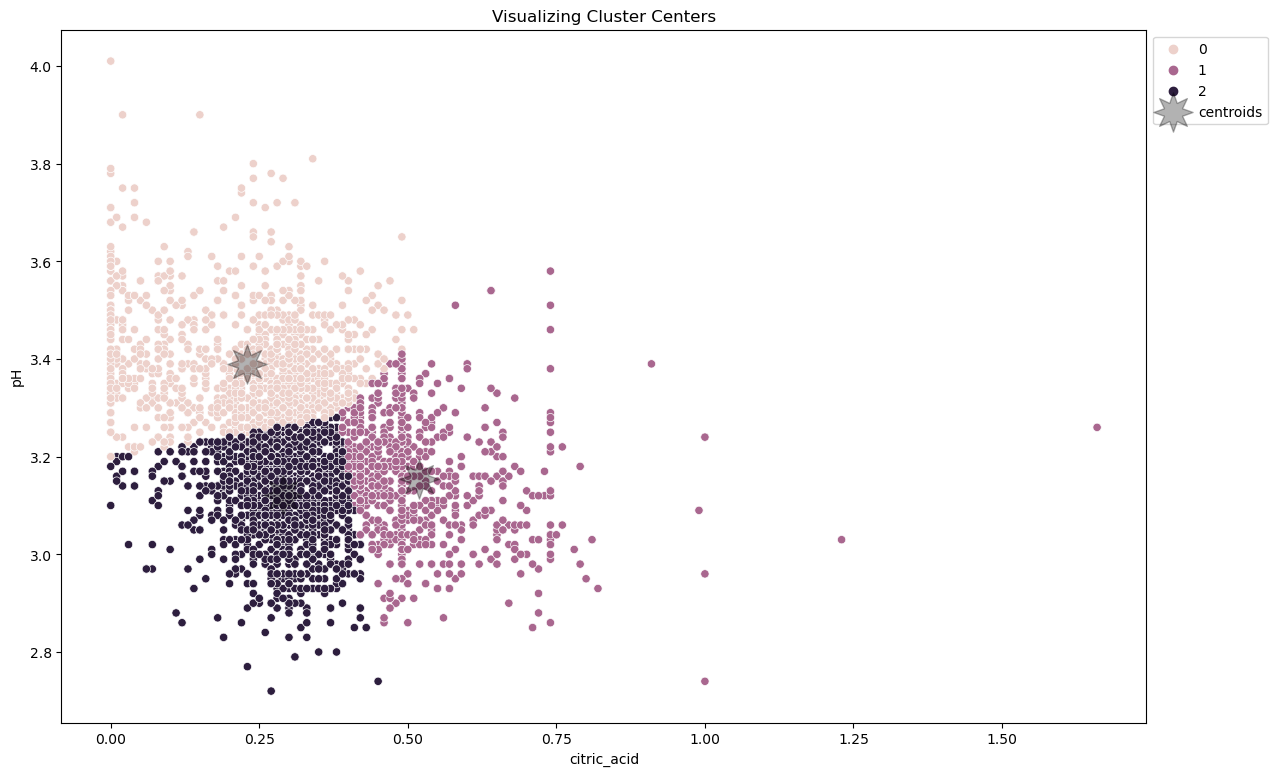

In [4]:
from wrangle import cluster1
cluster1 = cluster1(train)